## libs

In [1]:
# python utils
import itertools
import inspect

# pre-processing and exploring data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# model building
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.python.keras import utils
from tensorflow.keras import regularizers, optimizers

## Import Data

In [2]:
column_names = [
        'sepal_length', 
        'sepal_width',
        'petal_length', 
        'petal_width', 
        'class'
        ]

df = pd.read_csv('../datasets/iris.csv', names=column_names, header=0)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [3]:
df['class'] = df['class'].factorize()[0]
df['class'] = df['class'].astype("category")
df.dtypes

sepal_length     float64
sepal_width      float64
petal_length     float64
petal_width      float64
class           category
dtype: object

## Preprocessing Data

In [4]:
# split in input and output sets
input_df = df.drop("class", axis=1)
output_df = df["class"]

# split in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    input_df, output_df, test_size=0.25,
)

# One hot encode
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)

In [5]:
y_train[:5]

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

## Model Builder

In [6]:
def mlp_momentum_l2_MSE_classifier_builder(
    input_layer, hidden_layers, output_layer, l2_value, momentum_beta
):
    model = Sequential()

    # first hidden layer
    model.add(
        Dense(
            hidden_layers[0],
            input_dim=input_layer,
            activation="relu",
            kernel_regularizer=regularizers.l2(l2_value),
            bias_regularizer=regularizers.l2(l2_value),
        )
    )

    # following hidden layers
    for hidden_layer in hidden_layers[1:]:
        model.add(
            Dense(
                hidden_layer,
                activation="relu",
                kernel_regularizer=regularizers.l2(l2_value),
                bias_regularizer=regularizers.l2(l2_value),
            )
        )

    # output layer
    model.add(Dense(output_layer, activation="softmax"))

    # create model
    model.compile(
        loss="mean_squared_error",
#         loss="categorical_crossentropy",
        optimizer=optimizers.SGD(learning_rate=0.01, momentum=momentum_beta),
#         optimizer='adam',
        metrics=["accuracy"],
    )

    return model


def build_models(builder_method, *args_tests):
    """
    Build models with all the combinations of the args_test passed
    """
    builder_args_names = list(inspect.signature(builder_method).parameters.keys())
    return [
        dict((("model", builder_method(*args)),) + tuple(zip(builder_args_names, args)))
        for args in itertools.product(*args_tests)
    ]

## Models Definition

In [7]:
# Parameters definition
input_layer_tests = [4]
hidden_layers_tests = [[4, 4], [32, 32], [128, 128]]
output_layer_tests = [3]
l2_value_tests = [0.1, 0.01, 0.001]
momentum_beta_tests = [0.8, 0.9, 0.99]

In [8]:
# building models with all the combinations of the test parameters
models = build_models(
    mlp_momentum_l2_MSE_classifier_builder,
    input_layer_tests,
    hidden_layers_tests,
    output_layer_tests,
    l2_value_tests,
    momentum_beta_tests,
)
models

[{'model': <tensorflow.python.keras.engine.sequential.Sequential at 0x7f83050ff650>,
  'input_layer': 4,
  'hidden_layers': [4, 4],
  'output_layer': 3,
  'l2_value': 0.1,
  'momentum_beta': 0.8},
 {'model': <tensorflow.python.keras.engine.sequential.Sequential at 0x7f8305068f10>,
  'input_layer': 4,
  'hidden_layers': [4, 4],
  'output_layer': 3,
  'l2_value': 0.1,
  'momentum_beta': 0.9},
 {'model': <tensorflow.python.keras.engine.sequential.Sequential at 0x7f82fc66ac90>,
  'input_layer': 4,
  'hidden_layers': [4, 4],
  'output_layer': 3,
  'l2_value': 0.1,
  'momentum_beta': 0.99},
 {'model': <tensorflow.python.keras.engine.sequential.Sequential at 0x7f82fc515210>,
  'input_layer': 4,
  'hidden_layers': [4, 4],
  'output_layer': 3,
  'l2_value': 0.01,
  'momentum_beta': 0.8},
 {'model': <tensorflow.python.keras.engine.sequential.Sequential at 0x7f82fc2e6e50>,
  'input_layer': 4,
  'hidden_layers': [4, 4],
  'output_layer': 3,
  'l2_value': 0.01,
  'momentum_beta': 0.9},
 {'model': <

## Models Training

In [9]:
for model in models:
    model["results"] = model["model"].fit(
        X_train, y_train, epochs=500, batch_size=25
    )
    _, model["train_acc"] = model["model"].evaluate(X_train, y_train, verbose=0)
    _, model["test_acc"] = model["model"].evaluate(X_test, y_test, verbose=0)

Train on 111 samples
Epoch 1/500
111/111 [==============================] - 0s 442us/sample - loss: 1.2749 - accuracy: 0.3063
Epoch 2/500
111/111 [==============================] - 0s 51us/sample - loss: 1.1997 - accuracy: 0.3063
Epoch 3/500
111/111 [==============================] - 0s 37us/sample - loss: 1.0714 - accuracy: 0.3063
Epoch 4/500
111/111 [==============================] - 0s 51us/sample - loss: 0.9112 - accuracy: 0.3063
Epoch 5/500
111/111 [==============================] - 0s 46us/sample - loss: 0.7805 - accuracy: 0.3784
Epoch 6/500
111/111 [==============================] - 0s 54us/sample - loss: 0.7148 - accuracy: 0.5946
Epoch 7/500
111/111 [==============================] - 0s 54us/sample - loss: 0.6566 - accuracy: 0.5315
Epoch 8/500
111/111 [==============================] - 0s 52us/sample - loss: 0.6114 - accuracy: 0.3063
Epoch 9/500
111/111 [==============================] - 0s 60us/sample - loss: 0.5686 - accuracy: 0.3063
Epoch 10/500
111/111 [====================

111/111 [==============================] - 0s 58us/sample - loss: 0.1996 - accuracy: 0.6486
Epoch 155/500
111/111 [==============================] - 0s 38us/sample - loss: 0.1995 - accuracy: 0.6486
Epoch 156/500
111/111 [==============================] - 0s 54us/sample - loss: 0.1991 - accuracy: 0.6396
Epoch 157/500
111/111 [==============================] - 0s 50us/sample - loss: 0.1994 - accuracy: 0.6486
Epoch 158/500
111/111 [==============================] - 0s 53us/sample - loss: 0.1986 - accuracy: 0.6486
Epoch 159/500
111/111 [==============================] - 0s 57us/sample - loss: 0.1987 - accuracy: 0.6486
Epoch 160/500
111/111 [==============================] - 0s 56us/sample - loss: 0.1983 - accuracy: 0.6396
Epoch 161/500
111/111 [==============================] - 0s 54us/sample - loss: 0.1981 - accuracy: 0.6577
Epoch 162/500
111/111 [==============================] - 0s 43us/sample - loss: 0.1981 - accuracy: 0.6577
Epoch 163/500
111/111 [==============================] - 0s 

111/111 [==============================] - 0s 38us/sample - loss: 0.1762 - accuracy: 0.7027
Epoch 308/500
111/111 [==============================] - 0s 52us/sample - loss: 0.1763 - accuracy: 0.7117
Epoch 309/500
111/111 [==============================] - 0s 56us/sample - loss: 0.1763 - accuracy: 0.7748
Epoch 310/500
111/111 [==============================] - 0s 50us/sample - loss: 0.1757 - accuracy: 0.7207
Epoch 311/500
111/111 [==============================] - 0s 46us/sample - loss: 0.1760 - accuracy: 0.6757
Epoch 312/500
111/111 [==============================] - 0s 39us/sample - loss: 0.1758 - accuracy: 0.7297
Epoch 313/500
111/111 [==============================] - 0s 55us/sample - loss: 0.1756 - accuracy: 0.7297
Epoch 314/500
111/111 [==============================] - 0s 43us/sample - loss: 0.1756 - accuracy: 0.6847
Epoch 315/500
111/111 [==============================] - 0s 64us/sample - loss: 0.1752 - accuracy: 0.7297
Epoch 316/500
111/111 [==============================] - 0s 

111/111 [==============================] - 0s 34us/sample - loss: 0.1632 - accuracy: 0.8018
Epoch 461/500
111/111 [==============================] - 0s 35us/sample - loss: 0.1627 - accuracy: 0.8559
Epoch 462/500
111/111 [==============================] - 0s 34us/sample - loss: 0.1628 - accuracy: 0.8468
Epoch 463/500
111/111 [==============================] - 0s 33us/sample - loss: 0.1626 - accuracy: 0.8198
Epoch 464/500
111/111 [==============================] - 0s 33us/sample - loss: 0.1625 - accuracy: 0.8378
Epoch 465/500
111/111 [==============================] - 0s 35us/sample - loss: 0.1627 - accuracy: 0.8018
Epoch 466/500
111/111 [==============================] - 0s 31us/sample - loss: 0.1633 - accuracy: 0.8739
Epoch 467/500
111/111 [==============================] - 0s 35us/sample - loss: 0.1624 - accuracy: 0.8378
Epoch 468/500
111/111 [==============================] - 0s 33us/sample - loss: 0.1626 - accuracy: 0.8018
Epoch 469/500
111/111 [==============================] - 0s 

111/111 [==============================] - 0s 32us/sample - loss: 0.2218 - accuracy: 0.3604
Epoch 111/500
111/111 [==============================] - 0s 36us/sample - loss: 0.2217 - accuracy: 0.3604
Epoch 112/500
111/111 [==============================] - 0s 35us/sample - loss: 0.2217 - accuracy: 0.3604
Epoch 113/500
111/111 [==============================] - 0s 37us/sample - loss: 0.2218 - accuracy: 0.3604
Epoch 114/500
111/111 [==============================] - 0s 37us/sample - loss: 0.2218 - accuracy: 0.3604
Epoch 115/500
111/111 [==============================] - 0s 34us/sample - loss: 0.2217 - accuracy: 0.3604
Epoch 116/500
111/111 [==============================] - 0s 35us/sample - loss: 0.2217 - accuracy: 0.3604
Epoch 117/500
111/111 [==============================] - 0s 35us/sample - loss: 0.2217 - accuracy: 0.3604
Epoch 118/500
111/111 [==============================] - 0s 35us/sample - loss: 0.2217 - accuracy: 0.3604
Epoch 119/500
111/111 [==============================] - 0s 

111/111 [==============================] - 0s 35us/sample - loss: 0.2217 - accuracy: 0.3604
Epoch 188/500
111/111 [==============================] - 0s 39us/sample - loss: 0.2218 - accuracy: 0.3604
Epoch 189/500
111/111 [==============================] - 0s 38us/sample - loss: 0.2217 - accuracy: 0.3604
Epoch 190/500
111/111 [==============================] - 0s 34us/sample - loss: 0.2217 - accuracy: 0.3604
Epoch 191/500
111/111 [==============================] - 0s 32us/sample - loss: 0.2217 - accuracy: 0.3604
Epoch 192/500
111/111 [==============================] - 0s 35us/sample - loss: 0.2217 - accuracy: 0.3604
Epoch 193/500
111/111 [==============================] - 0s 42us/sample - loss: 0.2217 - accuracy: 0.3604
Epoch 194/500
111/111 [==============================] - 0s 37us/sample - loss: 0.2217 - accuracy: 0.3604
Epoch 195/500
111/111 [==============================] - 0s 33us/sample - loss: 0.2217 - accuracy: 0.3604
Epoch 196/500
111/111 [==============================] - 0s 

111/111 [==============================] - 0s 34us/sample - loss: 0.2217 - accuracy: 0.3604
Epoch 342/500
111/111 [==============================] - 0s 35us/sample - loss: 0.2217 - accuracy: 0.3604
Epoch 343/500
111/111 [==============================] - 0s 35us/sample - loss: 0.2218 - accuracy: 0.3604
Epoch 344/500
111/111 [==============================] - 0s 38us/sample - loss: 0.2217 - accuracy: 0.3604
Epoch 345/500
111/111 [==============================] - 0s 33us/sample - loss: 0.2218 - accuracy: 0.3604
Epoch 346/500
111/111 [==============================] - 0s 35us/sample - loss: 0.2217 - accuracy: 0.3604
Epoch 347/500
111/111 [==============================] - 0s 33us/sample - loss: 0.2217 - accuracy: 0.3604
Epoch 348/500
111/111 [==============================] - ETA: 0s - loss: 0.2257 - accuracy: 0.20 - 0s 31us/sample - loss: 0.2218 - accuracy: 0.3604
Epoch 349/500
111/111 [==============================] - 0s 33us/sample - loss: 0.2217 - accuracy: 0.3604
Epoch 350/500
111/

111/111 [==============================] - 0s 35us/sample - loss: 0.2218 - accuracy: 0.3604
Epoch 495/500
111/111 [==============================] - 0s 35us/sample - loss: 0.2217 - accuracy: 0.3604
Epoch 496/500
111/111 [==============================] - 0s 35us/sample - loss: 0.2217 - accuracy: 0.3604
Epoch 497/500
111/111 [==============================] - 0s 36us/sample - loss: 0.2217 - accuracy: 0.3604
Epoch 498/500
111/111 [==============================] - 0s 33us/sample - loss: 0.2217 - accuracy: 0.3604
Epoch 499/500
111/111 [==============================] - 0s 38us/sample - loss: 0.2217 - accuracy: 0.3604
Epoch 500/500
111/111 [==============================] - 0s 33us/sample - loss: 0.2217 - accuracy: 0.3604
Train on 111 samples
Epoch 1/500
111/111 [==============================] - 0s 429us/sample - loss: 1.0788 - accuracy: 0.0090
Epoch 2/500
111/111 [==============================] - 0s 33us/sample - loss: 0.9888 - accuracy: 0.1622
Epoch 3/500
111/111 [=====================

111/111 [==============================] - 0s 35us/sample - loss: 0.1696 - accuracy: 0.7477
Epoch 68/500
111/111 [==============================] - 0s 33us/sample - loss: 0.1703 - accuracy: 0.7838
Epoch 69/500
111/111 [==============================] - 0s 34us/sample - loss: 0.1704 - accuracy: 0.7838
Epoch 70/500
111/111 [==============================] - 0s 39us/sample - loss: 0.1705 - accuracy: 0.8378
Epoch 71/500
111/111 [==============================] - 0s 35us/sample - loss: 0.1715 - accuracy: 0.8919
Epoch 72/500
111/111 [==============================] - 0s 34us/sample - loss: 0.1687 - accuracy: 0.8468
Epoch 73/500
111/111 [==============================] - 0s 36us/sample - loss: 0.1655 - accuracy: 0.8108
Epoch 74/500
111/111 [==============================] - 0s 39us/sample - loss: 0.1627 - accuracy: 0.9369
Epoch 75/500
111/111 [==============================] - 0s 31us/sample - loss: 0.1592 - accuracy: 0.9550
Epoch 76/500
111/111 [==============================] - 0s 31us/samp

111/111 [==============================] - 0s 50us/sample - loss: 0.1190 - accuracy: 0.8468
Epoch 222/500
111/111 [==============================] - 0s 38us/sample - loss: 0.1200 - accuracy: 0.8649
Epoch 223/500
111/111 [==============================] - 0s 62us/sample - loss: 0.1170 - accuracy: 0.8739
Epoch 224/500
111/111 [==============================] - 0s 50us/sample - loss: 0.1190 - accuracy: 0.8739
Epoch 225/500
111/111 [==============================] - 0s 53us/sample - loss: 0.1096 - accuracy: 0.9189
Epoch 226/500
111/111 [==============================] - 0s 50us/sample - loss: 0.1037 - accuracy: 0.9550
Epoch 227/500
111/111 [==============================] - 0s 49us/sample - loss: 0.1040 - accuracy: 0.9369
Epoch 228/500
111/111 [==============================] - 0s 56us/sample - loss: 0.1264 - accuracy: 0.8468
Epoch 229/500
111/111 [==============================] - 0s 40us/sample - loss: 0.1320 - accuracy: 0.7748
Epoch 230/500
111/111 [==============================] - 0s 

111/111 [==============================] - 0s 44us/sample - loss: 0.0955 - accuracy: 0.9369
Epoch 376/500
111/111 [==============================] - 0s 47us/sample - loss: 0.1060 - accuracy: 0.8468
Epoch 377/500
111/111 [==============================] - 0s 70us/sample - loss: 0.0988 - accuracy: 0.9459
Epoch 378/500
111/111 [==============================] - 0s 79us/sample - loss: 0.0964 - accuracy: 0.9459
Epoch 379/500
111/111 [==============================] - 0s 75us/sample - loss: 0.0929 - accuracy: 0.9730
Epoch 380/500
111/111 [==============================] - 0s 95us/sample - loss: 0.0951 - accuracy: 0.9550
Epoch 381/500
111/111 [==============================] - 0s 78us/sample - loss: 0.0946 - accuracy: 0.9369
Epoch 382/500
111/111 [==============================] - 0s 72us/sample - loss: 0.0938 - accuracy: 0.9459
Epoch 383/500
111/111 [==============================] - 0s 73us/sample - loss: 0.1003 - accuracy: 0.9369
Epoch 384/500
111/111 [==============================] - 0s 

111/111 [==============================] - 0s 76us/sample - loss: 0.3481 - accuracy: 0.3604
Epoch 453/500
111/111 [==============================] - 0s 73us/sample - loss: 0.3109 - accuracy: 0.3423
Epoch 454/500
111/111 [==============================] - 0s 68us/sample - loss: 0.3549 - accuracy: 0.3333
Epoch 455/500
111/111 [==============================] - 0s 78us/sample - loss: 0.3401 - accuracy: 0.3333
Epoch 456/500
111/111 [==============================] - 0s 68us/sample - loss: 0.3051 - accuracy: 0.3514
Epoch 457/500
111/111 [==============================] - 0s 75us/sample - loss: 0.3455 - accuracy: 0.3604
Epoch 458/500
111/111 [==============================] - 0s 73us/sample - loss: 0.3305 - accuracy: 0.3604
Epoch 459/500
111/111 [==============================] - 0s 65us/sample - loss: 0.3119 - accuracy: 0.3423
Epoch 460/500
111/111 [==============================] - 0s 77us/sample - loss: 0.3305 - accuracy: 0.3333
Epoch 461/500
111/111 [==============================] - 0s 

111/111 [==============================] - 0s 69us/sample - loss: 0.1383 - accuracy: 0.8919
Epoch 103/500
111/111 [==============================] - 0s 64us/sample - loss: 0.1376 - accuracy: 0.9369
Epoch 104/500
111/111 [==============================] - 0s 70us/sample - loss: 0.1371 - accuracy: 0.9279
Epoch 105/500
111/111 [==============================] - 0s 67us/sample - loss: 0.1365 - accuracy: 0.9099
Epoch 106/500
111/111 [==============================] - 0s 69us/sample - loss: 0.1359 - accuracy: 0.9279
Epoch 107/500
111/111 [==============================] - 0s 73us/sample - loss: 0.1352 - accuracy: 0.9550
Epoch 108/500
111/111 [==============================] - 0s 69us/sample - loss: 0.1346 - accuracy: 0.9640
Epoch 109/500
111/111 [==============================] - 0s 70us/sample - loss: 0.1341 - accuracy: 0.9369
Epoch 110/500
111/111 [==============================] - 0s 68us/sample - loss: 0.1334 - accuracy: 0.9459
Epoch 111/500
111/111 [==============================] - 0s 

111/111 [==============================] - 0s 75us/sample - loss: 0.0838 - accuracy: 0.9459
Epoch 257/500
111/111 [==============================] - 0s 80us/sample - loss: 0.0778 - accuracy: 0.9820
Epoch 258/500
111/111 [==============================] - 0s 71us/sample - loss: 0.0800 - accuracy: 0.9640
Epoch 259/500
111/111 [==============================] - 0s 73us/sample - loss: 0.0813 - accuracy: 0.9640
Epoch 260/500
111/111 [==============================] - 0s 72us/sample - loss: 0.0785 - accuracy: 0.9730
Epoch 261/500
111/111 [==============================] - 0s 79us/sample - loss: 0.0775 - accuracy: 0.9730
Epoch 262/500
111/111 [==============================] - 0s 69us/sample - loss: 0.0777 - accuracy: 0.9820
Epoch 263/500
111/111 [==============================] - 0s 71us/sample - loss: 0.0777 - accuracy: 0.9820
Epoch 264/500
111/111 [==============================] - 0s 71us/sample - loss: 0.0767 - accuracy: 0.9820
Epoch 265/500
111/111 [==============================] - 0s 

111/111 [==============================] - 0s 63us/sample - loss: 0.0653 - accuracy: 0.9910
Epoch 411/500
111/111 [==============================] - 0s 64us/sample - loss: 0.0703 - accuracy: 0.9550
Epoch 412/500
111/111 [==============================] - 0s 72us/sample - loss: 0.0651 - accuracy: 0.9910
Epoch 413/500
111/111 [==============================] - 0s 77us/sample - loss: 0.0649 - accuracy: 0.9820
Epoch 414/500
111/111 [==============================] - 0s 68us/sample - loss: 0.0648 - accuracy: 0.9820
Epoch 415/500
111/111 [==============================] - 0s 76us/sample - loss: 0.0651 - accuracy: 0.9910
Epoch 416/500
111/111 [==============================] - 0s 72us/sample - loss: 0.0655 - accuracy: 0.9820
Epoch 417/500
111/111 [==============================] - 0s 77us/sample - loss: 0.0651 - accuracy: 0.9820
Epoch 418/500
111/111 [==============================] - 0s 69us/sample - loss: 0.0662 - accuracy: 0.9730
Epoch 419/500
111/111 [==============================] - 0s 

Epoch 60/500
111/111 [==============================] - 0s 68us/sample - loss: 0.1471 - accuracy: 0.6667
Epoch 61/500
111/111 [==============================] - 0s 70us/sample - loss: 0.1449 - accuracy: 0.8829
Epoch 62/500
111/111 [==============================] - 0s 70us/sample - loss: 0.1434 - accuracy: 0.9640
Epoch 63/500
111/111 [==============================] - 0s 65us/sample - loss: 0.1414 - accuracy: 0.9640
Epoch 64/500
111/111 [==============================] - 0s 65us/sample - loss: 0.1407 - accuracy: 0.8829
Epoch 65/500
111/111 [==============================] - 0s 65us/sample - loss: 0.1395 - accuracy: 0.9099
Epoch 66/500
111/111 [==============================] - 0s 69us/sample - loss: 0.1382 - accuracy: 0.9640
Epoch 67/500
111/111 [==============================] - 0s 76us/sample - loss: 0.1384 - accuracy: 0.8919
Epoch 68/500
111/111 [==============================] - 0s 70us/sample - loss: 0.1357 - accuracy: 0.9099
Epoch 69/500
111/111 [==============================] -

111/111 [==============================] - 0s 77us/sample - loss: 0.0664 - accuracy: 0.9910
Epoch 215/500
111/111 [==============================] - 0s 78us/sample - loss: 0.0652 - accuracy: 0.9910
Epoch 216/500
111/111 [==============================] - 0s 66us/sample - loss: 0.0656 - accuracy: 0.9820
Epoch 217/500
111/111 [==============================] - 0s 71us/sample - loss: 0.0652 - accuracy: 0.9910
Epoch 218/500
111/111 [==============================] - 0s 74us/sample - loss: 0.0660 - accuracy: 0.9910
Epoch 219/500
111/111 [==============================] - 0s 71us/sample - loss: 0.0649 - accuracy: 0.9820
Epoch 220/500
111/111 [==============================] - 0s 69us/sample - loss: 0.0660 - accuracy: 0.9910
Epoch 221/500
111/111 [==============================] - 0s 73us/sample - loss: 0.0652 - accuracy: 0.9910
Epoch 222/500
111/111 [==============================] - 0s 72us/sample - loss: 0.0668 - accuracy: 0.9730
Epoch 223/500
111/111 [==============================] - 0s 

111/111 [==============================] - 0s 80us/sample - loss: 0.0559 - accuracy: 0.9820
Epoch 369/500
111/111 [==============================] - 0s 76us/sample - loss: 0.0551 - accuracy: 0.9910
Epoch 370/500
111/111 [==============================] - 0s 70us/sample - loss: 0.0568 - accuracy: 0.9820
Epoch 371/500
111/111 [==============================] - 0s 73us/sample - loss: 0.0569 - accuracy: 0.9820
Epoch 372/500
111/111 [==============================] - 0s 72us/sample - loss: 0.0585 - accuracy: 0.9730
Epoch 373/500
111/111 [==============================] - 0s 84us/sample - loss: 0.0551 - accuracy: 0.9910
Epoch 374/500
111/111 [==============================] - 0s 78us/sample - loss: 0.0556 - accuracy: 0.9820
Epoch 375/500
111/111 [==============================] - 0s 71us/sample - loss: 0.0558 - accuracy: 0.9910
Epoch 376/500
111/111 [==============================] - 0s 72us/sample - loss: 0.0551 - accuracy: 0.9910
Epoch 377/500
111/111 [==============================] - 0s 

111/111 [==============================] - 0s 74us/sample - loss: 0.0563 - accuracy: 0.9730
Epoch 446/500
111/111 [==============================] - 0s 79us/sample - loss: 0.0572 - accuracy: 0.9640
Epoch 447/500
111/111 [==============================] - 0s 75us/sample - loss: 0.0567 - accuracy: 0.9640
Epoch 448/500
111/111 [==============================] - 0s 69us/sample - loss: 0.0531 - accuracy: 0.9820
Epoch 449/500
111/111 [==============================] - 0s 76us/sample - loss: 0.0545 - accuracy: 0.9820
Epoch 450/500
111/111 [==============================] - 0s 78us/sample - loss: 0.0535 - accuracy: 0.9820
Epoch 451/500
111/111 [==============================] - 0s 74us/sample - loss: 0.0546 - accuracy: 0.9820
Epoch 452/500
111/111 [==============================] - 0s 69us/sample - loss: 0.0519 - accuracy: 0.9820
Epoch 453/500
111/111 [==============================] - 0s 71us/sample - loss: 0.0522 - accuracy: 0.9910
Epoch 454/500
111/111 [==============================] - 0s 

111/111 [==============================] - 0s 75us/sample - loss: 0.0612 - accuracy: 0.9550
Epoch 96/500
111/111 [==============================] - 0s 78us/sample - loss: 0.0779 - accuracy: 0.8829
Epoch 97/500
111/111 [==============================] - 0s 76us/sample - loss: 0.0918 - accuracy: 0.8919
Epoch 98/500
111/111 [==============================] - 0s 69us/sample - loss: 0.1153 - accuracy: 0.8649
Epoch 99/500
111/111 [==============================] - 0s 71us/sample - loss: 0.0898 - accuracy: 0.8829
Epoch 100/500
111/111 [==============================] - 0s 69us/sample - loss: 0.0953 - accuracy: 0.9279
Epoch 101/500
111/111 [==============================] - 0s 68us/sample - loss: 0.0839 - accuracy: 0.9189
Epoch 102/500
111/111 [==============================] - 0s 70us/sample - loss: 0.0915 - accuracy: 0.9369
Epoch 103/500
111/111 [==============================] - 0s 71us/sample - loss: 0.0870 - accuracy: 0.9369
Epoch 104/500
111/111 [==============================] - 0s 68us

111/111 [==============================] - 0s 69us/sample - loss: 0.1146 - accuracy: 0.8649
Epoch 250/500
111/111 [==============================] - 0s 75us/sample - loss: 0.1169 - accuracy: 0.9189
Epoch 251/500
111/111 [==============================] - 0s 67us/sample - loss: 0.1220 - accuracy: 0.8559
Epoch 252/500
111/111 [==============================] - 0s 73us/sample - loss: 0.1009 - accuracy: 0.9279
Epoch 253/500
111/111 [==============================] - 0s 76us/sample - loss: 0.1084 - accuracy: 0.9099
Epoch 254/500
111/111 [==============================] - 0s 70us/sample - loss: 0.0930 - accuracy: 0.9550
Epoch 255/500
111/111 [==============================] - 0s 72us/sample - loss: 0.1206 - accuracy: 0.8829
Epoch 256/500
111/111 [==============================] - 0s 67us/sample - loss: 0.0888 - accuracy: 0.9550
Epoch 257/500
111/111 [==============================] - 0s 73us/sample - loss: 0.1068 - accuracy: 0.8739
Epoch 258/500
111/111 [==============================] - 0s 

111/111 [==============================] - 0s 82us/sample - loss: 0.1007 - accuracy: 0.9099
Epoch 404/500
111/111 [==============================] - 0s 71us/sample - loss: 0.1587 - accuracy: 0.7568
Epoch 405/500
111/111 [==============================] - 0s 71us/sample - loss: 0.0929 - accuracy: 0.9009
Epoch 406/500
111/111 [==============================] - 0s 69us/sample - loss: 0.1522 - accuracy: 0.7748
Epoch 407/500
111/111 [==============================] - 0s 73us/sample - loss: 0.1372 - accuracy: 0.8018
Epoch 408/500
111/111 [==============================] - 0s 69us/sample - loss: 0.1156 - accuracy: 0.8198
Epoch 409/500
111/111 [==============================] - 0s 71us/sample - loss: 0.1662 - accuracy: 0.7117
Epoch 410/500
111/111 [==============================] - 0s 69us/sample - loss: 0.0815 - accuracy: 0.9189
Epoch 411/500
111/111 [==============================] - 0s 71us/sample - loss: 0.1774 - accuracy: 0.7117
Epoch 412/500
111/111 [==============================] - 0s 

111/111 [==============================] - 0s 75us/sample - loss: 0.1692 - accuracy: 0.6396
Epoch 53/500
111/111 [==============================] - 0s 73us/sample - loss: 0.1683 - accuracy: 0.6396
Epoch 54/500
111/111 [==============================] - 0s 76us/sample - loss: 0.1674 - accuracy: 0.6396
Epoch 55/500
111/111 [==============================] - 0s 84us/sample - loss: 0.1665 - accuracy: 0.6396
Epoch 56/500
111/111 [==============================] - 0s 91us/sample - loss: 0.1657 - accuracy: 0.6396
Epoch 57/500
111/111 [==============================] - 0s 87us/sample - loss: 0.1648 - accuracy: 0.6396
Epoch 58/500
111/111 [==============================] - 0s 80us/sample - loss: 0.1640 - accuracy: 0.6577
Epoch 59/500
111/111 [==============================] - 0s 72us/sample - loss: 0.1633 - accuracy: 0.6577
Epoch 60/500
111/111 [==============================] - 0s 78us/sample - loss: 0.1622 - accuracy: 0.6577
Epoch 61/500
111/111 [==============================] - 0s 72us/samp

111/111 [==============================] - 0s 65us/sample - loss: 0.0934 - accuracy: 0.9369
Epoch 207/500
111/111 [==============================] - 0s 71us/sample - loss: 0.0932 - accuracy: 0.9459
Epoch 208/500
111/111 [==============================] - 0s 67us/sample - loss: 0.0928 - accuracy: 0.9099
Epoch 209/500
111/111 [==============================] - 0s 80us/sample - loss: 0.0921 - accuracy: 0.9279
Epoch 210/500
111/111 [==============================] - 0s 75us/sample - loss: 0.0916 - accuracy: 0.9550
Epoch 211/500
111/111 [==============================] - 0s 77us/sample - loss: 0.0910 - accuracy: 0.9640
Epoch 212/500
111/111 [==============================] - 0s 69us/sample - loss: 0.0907 - accuracy: 0.9369
Epoch 213/500
111/111 [==============================] - 0s 67us/sample - loss: 0.0904 - accuracy: 0.9550
Epoch 214/500
111/111 [==============================] - 0s 81us/sample - loss: 0.0895 - accuracy: 0.9640
Epoch 215/500
111/111 [==============================] - 0s 

111/111 [==============================] - 0s 69us/sample - loss: 0.0321 - accuracy: 0.9910
Epoch 361/500
111/111 [==============================] - 0s 69us/sample - loss: 0.0333 - accuracy: 0.9730
Epoch 362/500
111/111 [==============================] - 0s 72us/sample - loss: 0.0309 - accuracy: 0.9820
Epoch 363/500
111/111 [==============================] - 0s 68us/sample - loss: 0.0308 - accuracy: 0.9820
Epoch 364/500
111/111 [==============================] - 0s 73us/sample - loss: 0.0315 - accuracy: 0.9730
Epoch 365/500
111/111 [==============================] - 0s 77us/sample - loss: 0.0310 - accuracy: 0.9730
Epoch 366/500
111/111 [==============================] - 0s 78us/sample - loss: 0.0319 - accuracy: 0.9730
Epoch 367/500
111/111 [==============================] - 0s 68us/sample - loss: 0.0351 - accuracy: 0.9640
Epoch 368/500
111/111 [==============================] - 0s 82us/sample - loss: 0.0297 - accuracy: 0.9910
Epoch 369/500
111/111 [==============================] - 0s 

111/111 [==============================] - 0s 78us/sample - loss: 0.2389 - accuracy: 0.5405
Epoch 10/500
111/111 [==============================] - 0s 73us/sample - loss: 0.2262 - accuracy: 0.4234
Epoch 11/500
111/111 [==============================] - 0s 65us/sample - loss: 0.2180 - accuracy: 0.5856
Epoch 12/500
111/111 [==============================] - 0s 74us/sample - loss: 0.2166 - accuracy: 0.5405
Epoch 13/500
111/111 [==============================] - 0s 65us/sample - loss: 0.2155 - accuracy: 0.4955
Epoch 14/500
111/111 [==============================] - 0s 72us/sample - loss: 0.2141 - accuracy: 0.5045
Epoch 15/500
111/111 [==============================] - 0s 64us/sample - loss: 0.2126 - accuracy: 0.5405
Epoch 16/500
111/111 [==============================] - 0s 66us/sample - loss: 0.2110 - accuracy: 0.5495
Epoch 17/500
111/111 [==============================] - 0s 67us/sample - loss: 0.2092 - accuracy: 0.5766
Epoch 18/500
111/111 [==============================] - 0s 65us/samp

111/111 [==============================] - 0s 75us/sample - loss: 0.0797 - accuracy: 0.9820
Epoch 165/500
111/111 [==============================] - 0s 69us/sample - loss: 0.0789 - accuracy: 0.9820
Epoch 166/500
111/111 [==============================] - 0s 70us/sample - loss: 0.0793 - accuracy: 0.9369
Epoch 167/500
111/111 [==============================] - 0s 68us/sample - loss: 0.0792 - accuracy: 0.9640
Epoch 168/500
111/111 [==============================] - 0s 72us/sample - loss: 0.0784 - accuracy: 0.9820
Epoch 169/500
111/111 [==============================] - 0s 68us/sample - loss: 0.0778 - accuracy: 0.9640
Epoch 170/500
111/111 [==============================] - 0s 70us/sample - loss: 0.0774 - accuracy: 0.9550
Epoch 171/500
111/111 [==============================] - 0s 68us/sample - loss: 0.0770 - accuracy: 0.9640
Epoch 172/500
111/111 [==============================] - 0s 71us/sample - loss: 0.0768 - accuracy: 0.9730
Epoch 173/500
111/111 [==============================] - 0s 

111/111 [==============================] - 0s 70us/sample - loss: 0.0495 - accuracy: 0.9820
Epoch 319/500
111/111 [==============================] - 0s 67us/sample - loss: 0.0496 - accuracy: 0.9730
Epoch 320/500
111/111 [==============================] - 0s 73us/sample - loss: 0.0493 - accuracy: 0.9820
Epoch 321/500
111/111 [==============================] - 0s 65us/sample - loss: 0.0497 - accuracy: 0.9820
Epoch 322/500
111/111 [==============================] - 0s 69us/sample - loss: 0.0491 - accuracy: 0.9820
Epoch 323/500
111/111 [==============================] - 0s 72us/sample - loss: 0.0491 - accuracy: 0.9820
Epoch 324/500
111/111 [==============================] - 0s 74us/sample - loss: 0.0488 - accuracy: 0.9730
Epoch 325/500
111/111 [==============================] - 0s 74us/sample - loss: 0.0491 - accuracy: 0.9820
Epoch 326/500
111/111 [==============================] - 0s 85us/sample - loss: 0.0486 - accuracy: 0.9640
Epoch 327/500
111/111 [==============================] - 0s 

111/111 [==============================] - 0s 65us/sample - loss: 0.0387 - accuracy: 0.9910
Epoch 473/500
111/111 [==============================] - 0s 75us/sample - loss: 0.0390 - accuracy: 0.9820
Epoch 474/500
111/111 [==============================] - 0s 71us/sample - loss: 0.0389 - accuracy: 0.9910
Epoch 475/500
111/111 [==============================] - 0s 77us/sample - loss: 0.0389 - accuracy: 0.9820
Epoch 476/500
111/111 [==============================] - 0s 66us/sample - loss: 0.0383 - accuracy: 0.9820
Epoch 477/500
111/111 [==============================] - 0s 73us/sample - loss: 0.0389 - accuracy: 0.9820
Epoch 478/500
111/111 [==============================] - 0s 71us/sample - loss: 0.0390 - accuracy: 0.9820
Epoch 479/500
111/111 [==============================] - 0s 68us/sample - loss: 0.0388 - accuracy: 0.9910
Epoch 480/500
111/111 [==============================] - 0s 71us/sample - loss: 0.0384 - accuracy: 0.9820
Epoch 481/500
111/111 [==============================] - 0s 

Epoch 122/500
111/111 [==============================] - 0s 88us/sample - loss: 0.0885 - accuracy: 0.8468
Epoch 123/500
111/111 [==============================] - 0s 64us/sample - loss: 0.0433 - accuracy: 0.9730
Epoch 124/500
111/111 [==============================] - 0s 67us/sample - loss: 0.0676 - accuracy: 0.8829
Epoch 125/500
111/111 [==============================] - 0s 69us/sample - loss: 0.0396 - accuracy: 0.9640
Epoch 126/500
111/111 [==============================] - 0s 77us/sample - loss: 0.0749 - accuracy: 0.8649
Epoch 127/500
111/111 [==============================] - 0s 67us/sample - loss: 0.0432 - accuracy: 0.9550
Epoch 128/500
111/111 [==============================] - 0s 68us/sample - loss: 0.0629 - accuracy: 0.8829
Epoch 129/500
111/111 [==============================] - 0s 69us/sample - loss: 0.0602 - accuracy: 0.9009
Epoch 130/500
111/111 [==============================] - 0s 75us/sample - loss: 0.0451 - accuracy: 0.9550
Epoch 131/500
111/111 [=======================

111/111 [==============================] - 0s 79us/sample - loss: 0.0198 - accuracy: 0.9820
Epoch 277/500
111/111 [==============================] - 0s 76us/sample - loss: 0.0206 - accuracy: 0.9820
Epoch 278/500
111/111 [==============================] - 0s 75us/sample - loss: 0.0157 - accuracy: 0.9820
Epoch 279/500
111/111 [==============================] - 0s 80us/sample - loss: 0.0253 - accuracy: 0.9550
Epoch 280/500
111/111 [==============================] - 0s 77us/sample - loss: 0.0183 - accuracy: 0.9910
Epoch 281/500
111/111 [==============================] - 0s 78us/sample - loss: 0.0273 - accuracy: 0.9730
Epoch 282/500
111/111 [==============================] - 0s 76us/sample - loss: 0.0198 - accuracy: 0.9820
Epoch 283/500
111/111 [==============================] - 0s 68us/sample - loss: 0.0549 - accuracy: 0.9009
Epoch 284/500
111/111 [==============================] - 0s 78us/sample - loss: 0.0402 - accuracy: 0.9279
Epoch 285/500
111/111 [==============================] - 0s 

111/111 [==============================] - 0s 76us/sample - loss: 0.0181 - accuracy: 0.9910
Epoch 354/500
111/111 [==============================] - 0s 77us/sample - loss: 0.0184 - accuracy: 0.9910
Epoch 355/500
111/111 [==============================] - 0s 76us/sample - loss: 0.0180 - accuracy: 0.9910
Epoch 356/500
111/111 [==============================] - 0s 89us/sample - loss: 0.0180 - accuracy: 0.9910
Epoch 357/500
111/111 [==============================] - 0s 83us/sample - loss: 0.0185 - accuracy: 0.9910
Epoch 358/500
111/111 [==============================] - 0s 77us/sample - loss: 0.0177 - accuracy: 0.9910
Epoch 359/500
111/111 [==============================] - 0s 78us/sample - loss: 0.0185 - accuracy: 0.9910
Epoch 360/500
111/111 [==============================] - 0s 73us/sample - loss: 0.0184 - accuracy: 0.9910
Epoch 361/500
111/111 [==============================] - 0s 69us/sample - loss: 0.0185 - accuracy: 0.9910
Epoch 362/500
111/111 [==============================] - 0s 

111/111 [==============================] - 0s 82us/sample - loss: 4.0395 - accuracy: 0.3063
Epoch 3/500
111/111 [==============================] - 0s 95us/sample - loss: 3.7001 - accuracy: 0.3063
Epoch 4/500
111/111 [==============================] - 0s 93us/sample - loss: 3.3628 - accuracy: 0.5315
Epoch 5/500
111/111 [==============================] - 0s 87us/sample - loss: 3.0478 - accuracy: 0.6126
Epoch 6/500
111/111 [==============================] - 0s 89us/sample - loss: 2.7617 - accuracy: 0.3964
Epoch 7/500
111/111 [==============================] - 0s 84us/sample - loss: 2.5073 - accuracy: 0.3063
Epoch 8/500
111/111 [==============================] - 0s 84us/sample - loss: 2.2739 - accuracy: 0.3063
Epoch 9/500
111/111 [==============================] - 0s 87us/sample - loss: 2.0666 - accuracy: 0.4234
Epoch 10/500
111/111 [==============================] - 0s 84us/sample - loss: 1.8806 - accuracy: 0.5135
Epoch 11/500
111/111 [==============================] - 0s 91us/sample - lo

111/111 [==============================] - 0s 80us/sample - loss: 0.2141 - accuracy: 0.9369
Epoch 158/500
111/111 [==============================] - 0s 84us/sample - loss: 0.2141 - accuracy: 0.9640
Epoch 159/500
111/111 [==============================] - 0s 77us/sample - loss: 0.2139 - accuracy: 0.9640
Epoch 160/500
111/111 [==============================] - 0s 77us/sample - loss: 0.2136 - accuracy: 0.9550
Epoch 161/500
111/111 [==============================] - 0s 77us/sample - loss: 0.2136 - accuracy: 0.9550
Epoch 162/500
111/111 [==============================] - 0s 78us/sample - loss: 0.2135 - accuracy: 0.9730
Epoch 163/500
111/111 [==============================] - 0s 74us/sample - loss: 0.2134 - accuracy: 0.9640
Epoch 164/500
111/111 [==============================] - 0s 72us/sample - loss: 0.2131 - accuracy: 0.9640
Epoch 165/500
111/111 [==============================] - 0s 77us/sample - loss: 0.2133 - accuracy: 0.9640
Epoch 166/500
111/111 [==============================] - 0s 

111/111 [==============================] - 0s 72us/sample - loss: 0.1897 - accuracy: 0.7117
Epoch 311/500
111/111 [==============================] - 0s 76us/sample - loss: 0.1896 - accuracy: 0.7117
Epoch 312/500
111/111 [==============================] - 0s 83us/sample - loss: 0.1896 - accuracy: 0.7117
Epoch 313/500
111/111 [==============================] - 0s 77us/sample - loss: 0.1893 - accuracy: 0.7027
Epoch 314/500
111/111 [==============================] - 0s 79us/sample - loss: 0.1892 - accuracy: 0.7297
Epoch 315/500
111/111 [==============================] - 0s 81us/sample - loss: 0.1891 - accuracy: 0.7568
Epoch 316/500
111/111 [==============================] - 0s 97us/sample - loss: 0.1889 - accuracy: 0.6937
Epoch 317/500
111/111 [==============================] - 0s 78us/sample - loss: 0.1888 - accuracy: 0.6757
Epoch 318/500
111/111 [==============================] - 0s 71us/sample - loss: 0.1890 - accuracy: 0.7477
Epoch 319/500
111/111 [==============================] - 0s 

111/111 [==============================] - 0s 80us/sample - loss: 0.1730 - accuracy: 0.8018
Epoch 465/500
111/111 [==============================] - 0s 78us/sample - loss: 0.1729 - accuracy: 0.7748
Epoch 466/500
111/111 [==============================] - 0s 72us/sample - loss: 0.1728 - accuracy: 0.7838
Epoch 467/500
111/111 [==============================] - 0s 77us/sample - loss: 0.1728 - accuracy: 0.8108
Epoch 468/500
111/111 [==============================] - 0s 86us/sample - loss: 0.1727 - accuracy: 0.7928
Epoch 469/500
111/111 [==============================] - 0s 74us/sample - loss: 0.1725 - accuracy: 0.8198
Epoch 470/500
111/111 [==============================] - 0s 72us/sample - loss: 0.1726 - accuracy: 0.8378
Epoch 471/500
111/111 [==============================] - 0s 79us/sample - loss: 0.1724 - accuracy: 0.8288
Epoch 472/500
111/111 [==============================] - 0s 78us/sample - loss: 0.1727 - accuracy: 0.7477
Epoch 473/500
111/111 [==============================] - 0s 

111/111 [==============================] - 0s 111us/sample - loss: 0.1969 - accuracy: 0.6486
Epoch 114/500
111/111 [==============================] - 0s 94us/sample - loss: 0.1965 - accuracy: 0.6577
Epoch 115/500
111/111 [==============================] - 0s 101us/sample - loss: 0.1960 - accuracy: 0.6667
Epoch 116/500
111/111 [==============================] - 0s 87us/sample - loss: 0.1957 - accuracy: 0.6667
Epoch 117/500
111/111 [==============================] - 0s 92us/sample - loss: 0.1953 - accuracy: 0.6667
Epoch 118/500
111/111 [==============================] - 0s 92us/sample - loss: 0.1950 - accuracy: 0.6667
Epoch 119/500
111/111 [==============================] - 0s 93us/sample - loss: 0.1946 - accuracy: 0.6667
Epoch 120/500
111/111 [==============================] - 0s 85us/sample - loss: 0.1943 - accuracy: 0.6667
Epoch 121/500
111/111 [==============================] - 0s 87us/sample - loss: 0.1940 - accuracy: 0.6667
Epoch 122/500
111/111 [==============================] - 0

111/111 [==============================] - 0s 90us/sample - loss: 0.1647 - accuracy: 0.8649
Epoch 267/500
111/111 [==============================] - 0s 93us/sample - loss: 0.1644 - accuracy: 0.9099
Epoch 268/500
111/111 [==============================] - 0s 76us/sample - loss: 0.1643 - accuracy: 0.8559
Epoch 269/500
111/111 [==============================] - 0s 70us/sample - loss: 0.1640 - accuracy: 0.8649
Epoch 270/500
111/111 [==============================] - 0s 74us/sample - loss: 0.1641 - accuracy: 0.8468
Epoch 271/500
111/111 [==============================] - 0s 78us/sample - loss: 0.1637 - accuracy: 0.8198
Epoch 272/500
111/111 [==============================] - 0s 78us/sample - loss: 0.1634 - accuracy: 0.8378
Epoch 273/500
111/111 [==============================] - 0s 73us/sample - loss: 0.1636 - accuracy: 0.8739
Epoch 274/500
111/111 [==============================] - 0s 75us/sample - loss: 0.1634 - accuracy: 0.8739
Epoch 275/500
111/111 [==============================] - 0s 

111/111 [==============================] - 0s 74us/sample - loss: 0.1558 - accuracy: 0.9369
Epoch 344/500
111/111 [==============================] - 0s 77us/sample - loss: 0.1555 - accuracy: 0.8829
Epoch 345/500
111/111 [==============================] - 0s 71us/sample - loss: 0.1553 - accuracy: 0.9369
Epoch 346/500
111/111 [==============================] - 0s 75us/sample - loss: 0.1553 - accuracy: 0.9459
Epoch 347/500
111/111 [==============================] - 0s 69us/sample - loss: 0.1553 - accuracy: 0.9279
Epoch 348/500
111/111 [==============================] - 0s 75us/sample - loss: 0.1557 - accuracy: 0.9640
Epoch 349/500
111/111 [==============================] - 0s 71us/sample - loss: 0.1553 - accuracy: 0.9099
Epoch 350/500
111/111 [==============================] - 0s 70us/sample - loss: 0.1553 - accuracy: 0.9189
Epoch 351/500
111/111 [==============================] - 0s 74us/sample - loss: 0.1546 - accuracy: 0.9369
Epoch 352/500
111/111 [==============================] - 0s 

111/111 [==============================] - 0s 82us/sample - loss: 0.1430 - accuracy: 0.9640
Epoch 498/500
111/111 [==============================] - 0s 79us/sample - loss: 0.1430 - accuracy: 0.9369
Epoch 499/500
111/111 [==============================] - 0s 75us/sample - loss: 0.1426 - accuracy: 0.9640
Epoch 500/500
111/111 [==============================] - 0s 69us/sample - loss: 0.1424 - accuracy: 0.9459
Train on 111 samples
Epoch 1/500
111/111 [==============================] - 0s 622us/sample - loss: 4.1775 - accuracy: 0.4955
Epoch 2/500
111/111 [==============================] - 0s 82us/sample - loss: 3.8024 - accuracy: 0.3784
Epoch 3/500
111/111 [==============================] - 0s 80us/sample - loss: 3.1417 - accuracy: 0.5676
Epoch 4/500
111/111 [==============================] - 0s 75us/sample - loss: 2.3207 - accuracy: 0.6396
Epoch 5/500
111/111 [==============================] - 0s 74us/sample - loss: 1.5044 - accuracy: 0.6847
Epoch 6/500
111/111 [===========================

111/111 [==============================] - 0s 77us/sample - loss: 0.2405 - accuracy: 0.9369
Epoch 71/500
111/111 [==============================] - 0s 68us/sample - loss: 0.2422 - accuracy: 0.9640
Epoch 72/500
111/111 [==============================] - 0s 81us/sample - loss: 0.2361 - accuracy: 0.9550
Epoch 73/500
111/111 [==============================] - 0s 71us/sample - loss: 0.2255 - accuracy: 0.8919
Epoch 74/500
111/111 [==============================] - 0s 75us/sample - loss: 0.2104 - accuracy: 0.9279
Epoch 75/500
111/111 [==============================] - 0s 72us/sample - loss: 0.1880 - accuracy: 0.9640
Epoch 76/500
111/111 [==============================] - 0s 74us/sample - loss: 0.1712 - accuracy: 0.8919
Epoch 77/500
111/111 [==============================] - 0s 73us/sample - loss: 0.1599 - accuracy: 0.9640
Epoch 78/500
111/111 [==============================] - 0s 74us/sample - loss: 0.1467 - accuracy: 0.9459
Epoch 79/500
111/111 [==============================] - 0s 70us/samp

111/111 [==============================] - 0s 72us/sample - loss: 0.2001 - accuracy: 0.6937
Epoch 225/500
111/111 [==============================] - 0s 75us/sample - loss: 0.1845 - accuracy: 0.7297
Epoch 226/500
111/111 [==============================] - 0s 73us/sample - loss: 0.1465 - accuracy: 0.8108
Epoch 227/500
111/111 [==============================] - 0s 73us/sample - loss: 0.1445 - accuracy: 0.8108
Epoch 228/500
111/111 [==============================] - 0s 70us/sample - loss: 0.1786 - accuracy: 0.7207
Epoch 229/500
111/111 [==============================] - 0s 75us/sample - loss: 0.1822 - accuracy: 0.6937
Epoch 230/500
111/111 [==============================] - 0s 75us/sample - loss: 0.1620 - accuracy: 0.7477
Epoch 231/500
111/111 [==============================] - 0s 80us/sample - loss: 0.1538 - accuracy: 0.7748
Epoch 232/500
111/111 [==============================] - 0s 77us/sample - loss: 0.1464 - accuracy: 0.8288
Epoch 233/500
111/111 [==============================] - 0s 

111/111 [==============================] - 0s 78us/sample - loss: 0.1518 - accuracy: 0.7387
Epoch 379/500
111/111 [==============================] - 0s 78us/sample - loss: 0.1545 - accuracy: 0.7658
Epoch 380/500
111/111 [==============================] - 0s 84us/sample - loss: 0.1643 - accuracy: 0.7387
Epoch 381/500
111/111 [==============================] - 0s 79us/sample - loss: 0.1492 - accuracy: 0.7838
Epoch 382/500
111/111 [==============================] - 0s 88us/sample - loss: 0.1565 - accuracy: 0.7838
Epoch 383/500
111/111 [==============================] - 0s 83us/sample - loss: 0.1698 - accuracy: 0.7027
Epoch 384/500
111/111 [==============================] - 0s 80us/sample - loss: 0.1470 - accuracy: 0.7838
Epoch 385/500
111/111 [==============================] - 0s 76us/sample - loss: 0.1501 - accuracy: 0.7928
Epoch 386/500
111/111 [==============================] - 0s 83us/sample - loss: 0.1535 - accuracy: 0.7477
Epoch 387/500
111/111 [==============================] - 0s 

111/111 [==============================] - 0s 75us/sample - loss: 0.3966 - accuracy: 0.9640
Epoch 28/500
111/111 [==============================] - 0s 71us/sample - loss: 0.3942 - accuracy: 0.9459
Epoch 29/500
111/111 [==============================] - 0s 73us/sample - loss: 0.3899 - accuracy: 0.9640
Epoch 30/500
111/111 [==============================] - 0s 80us/sample - loss: 0.3872 - accuracy: 0.9369
Epoch 31/500
111/111 [==============================] - 0s 75us/sample - loss: 0.3826 - accuracy: 0.9730
Epoch 32/500
111/111 [==============================] - 0s 77us/sample - loss: 0.3784 - accuracy: 0.9730
Epoch 33/500
111/111 [==============================] - 0s 75us/sample - loss: 0.3752 - accuracy: 0.9820
Epoch 34/500
111/111 [==============================] - 0s 75us/sample - loss: 0.3714 - accuracy: 0.9820
Epoch 35/500
111/111 [==============================] - 0s 73us/sample - loss: 0.3681 - accuracy: 0.9730
Epoch 36/500
111/111 [==============================] - 0s 67us/samp

111/111 [==============================] - 0s 73us/sample - loss: 0.2122 - accuracy: 0.9730
Epoch 106/500
111/111 [==============================] - 0s 75us/sample - loss: 0.2120 - accuracy: 0.9730
Epoch 107/500
111/111 [==============================] - 0s 76us/sample - loss: 0.2082 - accuracy: 0.9820
Epoch 108/500
111/111 [==============================] - 0s 83us/sample - loss: 0.2073 - accuracy: 0.9910
Epoch 109/500
111/111 [==============================] - 0s 75us/sample - loss: 0.2059 - accuracy: 0.9820
Epoch 110/500
111/111 [==============================] - 0s 75us/sample - loss: 0.2065 - accuracy: 0.9730
Epoch 111/500
111/111 [==============================] - 0s 75us/sample - loss: 0.2029 - accuracy: 0.9820
Epoch 112/500
111/111 [==============================] - 0s 75us/sample - loss: 0.2028 - accuracy: 0.9820
Epoch 113/500
111/111 [==============================] - 0s 85us/sample - loss: 0.1996 - accuracy: 0.9820
Epoch 114/500
111/111 [==============================] - 0s 

111/111 [==============================] - 0s 81us/sample - loss: 0.0973 - accuracy: 0.9820
Epoch 260/500
111/111 [==============================] - 0s 71us/sample - loss: 0.0956 - accuracy: 0.9910
Epoch 261/500
111/111 [==============================] - 0s 74us/sample - loss: 0.0957 - accuracy: 0.9910
Epoch 262/500
111/111 [==============================] - 0s 75us/sample - loss: 0.0956 - accuracy: 0.9820
Epoch 263/500
111/111 [==============================] - 0s 76us/sample - loss: 0.0952 - accuracy: 0.9910
Epoch 264/500
111/111 [==============================] - 0s 75us/sample - loss: 0.0942 - accuracy: 0.9820
Epoch 265/500
111/111 [==============================] - 0s 80us/sample - loss: 0.0941 - accuracy: 0.9910
Epoch 266/500
111/111 [==============================] - 0s 75us/sample - loss: 0.0959 - accuracy: 0.9730
Epoch 267/500
111/111 [==============================] - 0s 76us/sample - loss: 0.0942 - accuracy: 0.9730
Epoch 268/500
111/111 [==============================] - 0s 

111/111 [==============================] - 0s 77us/sample - loss: 0.0682 - accuracy: 0.9820
Epoch 414/500
111/111 [==============================] - 0s 75us/sample - loss: 0.0679 - accuracy: 0.9820
Epoch 415/500
111/111 [==============================] - 0s 82us/sample - loss: 0.0671 - accuracy: 0.9820
Epoch 416/500
111/111 [==============================] - 0s 85us/sample - loss: 0.0682 - accuracy: 0.9910
Epoch 417/500
111/111 [==============================] - 0s 83us/sample - loss: 0.0673 - accuracy: 0.9910
Epoch 418/500
111/111 [==============================] - 0s 88us/sample - loss: 0.0680 - accuracy: 0.9910
Epoch 419/500
111/111 [==============================] - 0s 78us/sample - loss: 0.0678 - accuracy: 0.9910
Epoch 420/500
111/111 [==============================] - 0s 76us/sample - loss: 0.0672 - accuracy: 0.9820
Epoch 421/500
111/111 [==============================] - 0s 80us/sample - loss: 0.0667 - accuracy: 0.9820
Epoch 422/500
111/111 [==============================] - 0s 

111/111 [==============================] - 0s 77us/sample - loss: 0.1887 - accuracy: 0.9550
Epoch 64/500
111/111 [==============================] - 0s 81us/sample - loss: 0.1847 - accuracy: 0.9550
Epoch 65/500
111/111 [==============================] - 0s 79us/sample - loss: 0.1782 - accuracy: 0.9640
Epoch 66/500
111/111 [==============================] - 0s 77us/sample - loss: 0.1760 - accuracy: 0.9730
Epoch 67/500
111/111 [==============================] - 0s 70us/sample - loss: 0.1751 - accuracy: 0.9640
Epoch 68/500
111/111 [==============================] - 0s 74us/sample - loss: 0.1721 - accuracy: 0.9820
Epoch 69/500
111/111 [==============================] - 0s 69us/sample - loss: 0.1669 - accuracy: 0.9820
Epoch 70/500
111/111 [==============================] - 0s 71us/sample - loss: 0.1699 - accuracy: 0.9550
Epoch 71/500
111/111 [==============================] - 0s 70us/sample - loss: 0.1652 - accuracy: 0.9730
Epoch 72/500
111/111 [==============================] - 0s 70us/samp

111/111 [==============================] - 0s 85us/sample - loss: 0.0648 - accuracy: 0.9910
Epoch 218/500
111/111 [==============================] - 0s 75us/sample - loss: 0.0639 - accuracy: 0.9910
Epoch 219/500
111/111 [==============================] - 0s 75us/sample - loss: 0.0640 - accuracy: 0.9820
Epoch 220/500
111/111 [==============================] - 0s 73us/sample - loss: 0.0646 - accuracy: 0.9820
Epoch 221/500
111/111 [==============================] - 0s 71us/sample - loss: 0.0657 - accuracy: 0.9730
Epoch 222/500
111/111 [==============================] - 0s 78us/sample - loss: 0.0634 - accuracy: 0.9910
Epoch 223/500
111/111 [==============================] - 0s 76us/sample - loss: 0.0648 - accuracy: 0.9730
Epoch 224/500
111/111 [==============================] - 0s 74us/sample - loss: 0.0636 - accuracy: 0.9820
Epoch 225/500
111/111 [==============================] - 0s 84us/sample - loss: 0.0628 - accuracy: 0.9820
Epoch 226/500
111/111 [==============================] - 0s 

111/111 [==============================] - 0s 73us/sample - loss: 0.0562 - accuracy: 0.9640
Epoch 372/500
111/111 [==============================] - 0s 77us/sample - loss: 0.0538 - accuracy: 0.9910
Epoch 373/500
111/111 [==============================] - 0s 70us/sample - loss: 0.0527 - accuracy: 0.9910
Epoch 374/500
111/111 [==============================] - 0s 72us/sample - loss: 0.0536 - accuracy: 0.9820
Epoch 375/500
111/111 [==============================] - 0s 68us/sample - loss: 0.0557 - accuracy: 0.9640
Epoch 376/500
111/111 [==============================] - 0s 72us/sample - loss: 0.0566 - accuracy: 0.9730
Epoch 377/500
111/111 [==============================] - 0s 75us/sample - loss: 0.0638 - accuracy: 0.9550
Epoch 378/500
111/111 [==============================] - 0s 81us/sample - loss: 0.0540 - accuracy: 0.9730
Epoch 379/500
111/111 [==============================] - 0s 76us/sample - loss: 0.0558 - accuracy: 0.9730
Epoch 380/500
111/111 [==============================] - 0s 

111/111 [==============================] - 0s 78us/sample - loss: 0.1651 - accuracy: 0.9820
Epoch 21/500
111/111 [==============================] - 0s 75us/sample - loss: 0.1549 - accuracy: 0.9730
Epoch 22/500
111/111 [==============================] - 0s 76us/sample - loss: 0.1458 - accuracy: 0.9820
Epoch 23/500
111/111 [==============================] - 0s 68us/sample - loss: 0.1397 - accuracy: 0.9730
Epoch 24/500
111/111 [==============================] - 0s 76us/sample - loss: 0.1330 - accuracy: 0.9640
Epoch 25/500
111/111 [==============================] - 0s 78us/sample - loss: 0.1251 - accuracy: 0.9820
Epoch 26/500
111/111 [==============================] - 0s 70us/sample - loss: 0.1184 - accuracy: 0.9730
Epoch 27/500
111/111 [==============================] - 0s 67us/sample - loss: 0.1174 - accuracy: 0.9550
Epoch 28/500
111/111 [==============================] - 0s 71us/sample - loss: 0.1106 - accuracy: 0.9820
Epoch 29/500
111/111 [==============================] - 0s 85us/samp

111/111 [==============================] - 0s 79us/sample - loss: 0.0560 - accuracy: 0.9369
Epoch 176/500
111/111 [==============================] - 0s 83us/sample - loss: 0.0605 - accuracy: 0.9369
Epoch 177/500
111/111 [==============================] - 0s 79us/sample - loss: 0.0688 - accuracy: 0.9189
Epoch 178/500
111/111 [==============================] - 0s 72us/sample - loss: 0.0789 - accuracy: 0.8739
Epoch 179/500
111/111 [==============================] - 0s 77us/sample - loss: 0.0638 - accuracy: 0.9369
Epoch 180/500
111/111 [==============================] - 0s 75us/sample - loss: 0.0601 - accuracy: 0.9279
Epoch 181/500
111/111 [==============================] - 0s 79us/sample - loss: 0.0492 - accuracy: 0.9820
Epoch 182/500
111/111 [==============================] - 0s 72us/sample - loss: 0.0582 - accuracy: 0.9369
Epoch 183/500
111/111 [==============================] - 0s 78us/sample - loss: 0.0525 - accuracy: 0.9640
Epoch 184/500
111/111 [==============================] - 0s 

111/111 [==============================] - 0s 81us/sample - loss: 0.0889 - accuracy: 0.8288
Epoch 330/500
111/111 [==============================] - 0s 76us/sample - loss: 0.0786 - accuracy: 0.8829
Epoch 331/500
111/111 [==============================] - 0s 76us/sample - loss: 0.0621 - accuracy: 0.9459
Epoch 332/500
111/111 [==============================] - 0s 78us/sample - loss: 0.0942 - accuracy: 0.8378
Epoch 333/500
111/111 [==============================] - 0s 84us/sample - loss: 0.0682 - accuracy: 0.9009
Epoch 334/500
111/111 [==============================] - 0s 82us/sample - loss: 0.0640 - accuracy: 0.9550
Epoch 335/500
111/111 [==============================] - 0s 89us/sample - loss: 0.0721 - accuracy: 0.8829
Epoch 336/500
111/111 [==============================] - 0s 81us/sample - loss: 0.0608 - accuracy: 0.9550
Epoch 337/500
111/111 [==============================] - 0s 77us/sample - loss: 0.0589 - accuracy: 0.9550
Epoch 338/500
111/111 [==============================] - 0s 

111/111 [==============================] - 0s 88us/sample - loss: 0.0637 - accuracy: 0.9189
Epoch 484/500
111/111 [==============================] - 0s 76us/sample - loss: 0.0585 - accuracy: 0.9369
Epoch 485/500
111/111 [==============================] - 0s 79us/sample - loss: 0.0510 - accuracy: 0.9640
Epoch 486/500
111/111 [==============================] - 0s 81us/sample - loss: 0.0507 - accuracy: 0.9730
Epoch 487/500
111/111 [==============================] - 0s 75us/sample - loss: 0.0547 - accuracy: 0.9640
Epoch 488/500
111/111 [==============================] - 0s 76us/sample - loss: 0.0494 - accuracy: 0.9730
Epoch 489/500
111/111 [==============================] - 0s 82us/sample - loss: 0.0433 - accuracy: 0.9640
Epoch 490/500
111/111 [==============================] - 0s 79us/sample - loss: 0.0440 - accuracy: 1.0000
Epoch 491/500
111/111 [==============================] - 0s 74us/sample - loss: 0.0531 - accuracy: 0.9550
Epoch 492/500
111/111 [==============================] - 0s 

Epoch 56/500
111/111 [==============================] - 0s 90us/sample - loss: 0.0888 - accuracy: 0.9730
Epoch 57/500
111/111 [==============================] - 0s 76us/sample - loss: 0.0861 - accuracy: 0.9730
Epoch 58/500
111/111 [==============================] - 0s 88us/sample - loss: 0.0845 - accuracy: 0.9730
Epoch 59/500
111/111 [==============================] - 0s 76us/sample - loss: 0.0832 - accuracy: 0.9820
Epoch 60/500
111/111 [==============================] - 0s 72us/sample - loss: 0.0832 - accuracy: 0.9640
Epoch 61/500
111/111 [==============================] - 0s 72us/sample - loss: 0.0832 - accuracy: 0.9730
Epoch 62/500
111/111 [==============================] - 0s 67us/sample - loss: 0.0806 - accuracy: 0.9730
Epoch 63/500
111/111 [==============================] - 0s 69us/sample - loss: 0.0795 - accuracy: 0.9820
Epoch 64/500
111/111 [==============================] - 0s 68us/sample - loss: 0.0795 - accuracy: 0.9730
Epoch 65/500
111/111 [==============================] -

111/111 [==============================] - 0s 77us/sample - loss: 0.0542 - accuracy: 0.9730
Epoch 211/500
111/111 [==============================] - 0s 73us/sample - loss: 0.0545 - accuracy: 0.9730
Epoch 212/500
111/111 [==============================] - 0s 76us/sample - loss: 0.0524 - accuracy: 0.9820
Epoch 213/500
111/111 [==============================] - 0s 74us/sample - loss: 0.0529 - accuracy: 0.9820
Epoch 214/500
111/111 [==============================] - 0s 83us/sample - loss: 0.0523 - accuracy: 0.9820
Epoch 215/500
111/111 [==============================] - 0s 79us/sample - loss: 0.0525 - accuracy: 0.9820
Epoch 216/500
111/111 [==============================] - 0s 77us/sample - loss: 0.0527 - accuracy: 0.9730
Epoch 217/500
111/111 [==============================] - 0s 77us/sample - loss: 0.0536 - accuracy: 0.9730
Epoch 218/500
111/111 [==============================] - 0s 82us/sample - loss: 0.0522 - accuracy: 0.9820
Epoch 219/500
111/111 [==============================] - 0s 

Epoch 287/500
111/111 [==============================] - 0s 126us/sample - loss: 0.0500 - accuracy: 0.9730
Epoch 288/500
111/111 [==============================] - 0s 118us/sample - loss: 0.0483 - accuracy: 0.9910
Epoch 289/500
111/111 [==============================] - 0s 115us/sample - loss: 0.0491 - accuracy: 0.9820
Epoch 290/500
111/111 [==============================] - 0s 118us/sample - loss: 0.0495 - accuracy: 0.9910
Epoch 291/500
111/111 [==============================] - 0s 98us/sample - loss: 0.0484 - accuracy: 0.9910
Epoch 292/500
111/111 [==============================] - 0s 100us/sample - loss: 0.0489 - accuracy: 0.9820
Epoch 293/500
111/111 [==============================] - 0s 99us/sample - loss: 0.0487 - accuracy: 0.9910
Epoch 294/500
111/111 [==============================] - 0s 93us/sample - loss: 0.0491 - accuracy: 0.9730
Epoch 295/500
111/111 [==============================] - 0s 90us/sample - loss: 0.0485 - accuracy: 0.9910
Epoch 296/500
111/111 [==================

111/111 [==============================] - 0s 93us/sample - loss: 0.0449 - accuracy: 0.9820
Epoch 442/500
111/111 [==============================] - 0s 88us/sample - loss: 0.0441 - accuracy: 0.9730
Epoch 443/500
111/111 [==============================] - 0s 81us/sample - loss: 0.0453 - accuracy: 0.9730
Epoch 444/500
111/111 [==============================] - 0s 76us/sample - loss: 0.0508 - accuracy: 0.9550
Epoch 445/500
111/111 [==============================] - ETA: 0s - loss: 0.0437 - accuracy: 0.96 - 0s 77us/sample - loss: 0.0436 - accuracy: 0.9820
Epoch 446/500
111/111 [==============================] - 0s 92us/sample - loss: 0.0466 - accuracy: 0.9550
Epoch 447/500
111/111 [==============================] - 0s 77us/sample - loss: 0.0512 - accuracy: 0.9640
Epoch 448/500
111/111 [==============================] - 0s 76us/sample - loss: 0.0484 - accuracy: 0.9640
Epoch 449/500
111/111 [==============================] - 0s 82us/sample - loss: 0.0437 - accuracy: 0.9820
Epoch 450/500
111/

111/111 [==============================] - 0s 90us/sample - loss: 0.0622 - accuracy: 0.9459
Epoch 90/500
111/111 [==============================] - 0s 102us/sample - loss: 0.0601 - accuracy: 0.9640
Epoch 91/500
111/111 [==============================] - 0s 95us/sample - loss: 0.0563 - accuracy: 0.9730
Epoch 92/500
111/111 [==============================] - 0s 97us/sample - loss: 0.0557 - accuracy: 0.9730
Epoch 93/500
111/111 [==============================] - 0s 110us/sample - loss: 0.0549 - accuracy: 0.9730
Epoch 94/500
111/111 [==============================] - 0s 78us/sample - loss: 0.0570 - accuracy: 0.9730
Epoch 95/500
111/111 [==============================] - 0s 87us/sample - loss: 0.0539 - accuracy: 0.9820
Epoch 96/500
111/111 [==============================] - 0s 85us/sample - loss: 0.0534 - accuracy: 0.9820
Epoch 97/500
111/111 [==============================] - 0s 83us/sample - loss: 0.0545 - accuracy: 0.9820
Epoch 98/500
111/111 [==============================] - 0s 85us/sa

Epoch 243/500
111/111 [==============================] - 0s 133us/sample - loss: 0.0447 - accuracy: 0.9730
Epoch 244/500
111/111 [==============================] - ETA: 0s - loss: 0.0354 - accuracy: 1.00 - 0s 154us/sample - loss: 0.0430 - accuracy: 0.9820
Epoch 245/500
111/111 [==============================] - 0s 186us/sample - loss: 0.0433 - accuracy: 0.9730
Epoch 246/500
111/111 [==============================] - 0s 143us/sample - loss: 0.0433 - accuracy: 0.9730
Epoch 247/500
111/111 [==============================] - 0s 130us/sample - loss: 0.0553 - accuracy: 0.9369
Epoch 248/500
111/111 [==============================] - 0s 125us/sample - loss: 0.0448 - accuracy: 0.9730
Epoch 249/500
111/111 [==============================] - 0s 95us/sample - loss: 0.0438 - accuracy: 0.9730
Epoch 250/500
111/111 [==============================] - 0s 82us/sample - loss: 0.0465 - accuracy: 0.9550
Epoch 251/500
111/111 [==============================] - 0s 100us/sample - loss: 0.0440 - accuracy: 0.97

111/111 [==============================] - 0s 82us/sample - loss: 0.0356 - accuracy: 0.9910
Epoch 397/500
111/111 [==============================] - 0s 78us/sample - loss: 0.0359 - accuracy: 0.9910
Epoch 398/500
111/111 [==============================] - 0s 80us/sample - loss: 0.0355 - accuracy: 0.9910
Epoch 399/500
111/111 [==============================] - 0s 89us/sample - loss: 0.0355 - accuracy: 0.9820
Epoch 400/500
111/111 [==============================] - 0s 81us/sample - loss: 0.0349 - accuracy: 0.9910
Epoch 401/500
111/111 [==============================] - 0s 78us/sample - loss: 0.0356 - accuracy: 0.9910
Epoch 402/500
111/111 [==============================] - 0s 80us/sample - loss: 0.0367 - accuracy: 0.9820
Epoch 403/500
111/111 [==============================] - 0s 96us/sample - loss: 0.0361 - accuracy: 0.9820
Epoch 404/500
111/111 [==============================] - 0s 84us/sample - loss: 0.0360 - accuracy: 0.9820
Epoch 405/500
111/111 [==============================] - 0s 

111/111 [==============================] - 0s 106us/sample - loss: 0.0736 - accuracy: 0.9550
Epoch 46/500
111/111 [==============================] - 0s 110us/sample - loss: 0.1054 - accuracy: 0.9009
Epoch 47/500
111/111 [==============================] - 0s 103us/sample - loss: 0.1558 - accuracy: 0.8108
Epoch 48/500
111/111 [==============================] - 0s 83us/sample - loss: 0.0719 - accuracy: 0.9640
Epoch 49/500
111/111 [==============================] - 0s 82us/sample - loss: 0.1434 - accuracy: 0.8288
Epoch 50/500
111/111 [==============================] - 0s 95us/sample - loss: 0.0854 - accuracy: 0.9279
Epoch 51/500
111/111 [==============================] - 0s 85us/sample - loss: 0.0996 - accuracy: 0.9099
Epoch 52/500
111/111 [==============================] - 0s 89us/sample - loss: 0.1310 - accuracy: 0.8468
Epoch 53/500
111/111 [==============================] - 0s 81us/sample - loss: 0.0791 - accuracy: 0.9550
Epoch 54/500
111/111 [==============================] - 0s 105us/

Epoch 199/500
111/111 [==============================] - 0s 111us/sample - loss: 0.0270 - accuracy: 0.9640
Epoch 200/500
111/111 [==============================] - 0s 103us/sample - loss: 0.0446 - accuracy: 0.9279
Epoch 201/500
111/111 [==============================] - 0s 101us/sample - loss: 0.0377 - accuracy: 0.9640
Epoch 202/500
111/111 [==============================] - 0s 101us/sample - loss: 0.0267 - accuracy: 0.9820
Epoch 203/500
111/111 [==============================] - 0s 91us/sample - loss: 0.0417 - accuracy: 0.9279
Epoch 204/500
111/111 [==============================] - 0s 99us/sample - loss: 0.0250 - accuracy: 0.9730
Epoch 205/500
111/111 [==============================] - 0s 103us/sample - loss: 0.0443 - accuracy: 0.9459
Epoch 206/500
111/111 [==============================] - 0s 109us/sample - loss: 0.0307 - accuracy: 0.9640
Epoch 207/500
111/111 [==============================] - 0s 99us/sample - loss: 0.0323 - accuracy: 0.9550
Epoch 208/500
111/111 [=================

111/111 [==============================] - 0s 224us/sample - loss: 0.0241 - accuracy: 0.9910
Epoch 352/500
111/111 [==============================] - 0s 183us/sample - loss: 0.0463 - accuracy: 0.9279
Epoch 353/500
111/111 [==============================] - 0s 261us/sample - loss: 0.0348 - accuracy: 0.9730
Epoch 354/500
111/111 [==============================] - 0s 217us/sample - loss: 0.0325 - accuracy: 0.9730
Epoch 355/500
111/111 [==============================] - 0s 240us/sample - loss: 0.0437 - accuracy: 0.9550
Epoch 356/500
111/111 [==============================] - 0s 271us/sample - loss: 0.0348 - accuracy: 0.9459
Epoch 357/500
111/111 [==============================] - 0s 256us/sample - loss: 0.0330 - accuracy: 0.9550
Epoch 358/500
111/111 [==============================] - 0s 270us/sample - loss: 0.0277 - accuracy: 0.9730
Epoch 359/500
111/111 [==============================] - 0s 287us/sample - loss: 0.0289 - accuracy: 0.9820
Epoch 360/500
111/111 [============================

Train on 111 samples
Epoch 1/500
111/111 [==============================] - 0s 1ms/sample - loss: 13.6660 - accuracy: 0.6126
Epoch 2/500
111/111 [==============================] - 0s 116us/sample - loss: 12.8325 - accuracy: 0.8919
Epoch 3/500
111/111 [==============================] - 0s 120us/sample - loss: 11.7389 - accuracy: 0.8739
Epoch 4/500
111/111 [==============================] - 0s 118us/sample - loss: 10.6403 - accuracy: 0.9099
Epoch 5/500
111/111 [==============================] - 0s 115us/sample - loss: 9.6157 - accuracy: 0.6937
Epoch 6/500
111/111 [==============================] - 0s 105us/sample - loss: 8.6800 - accuracy: 0.6486
Epoch 7/500
111/111 [==============================] - 0s 106us/sample - loss: 7.8361 - accuracy: 0.7297
Epoch 8/500
111/111 [==============================] - 0s 129us/sample - loss: 7.0759 - accuracy: 0.6577
Epoch 9/500
111/111 [==============================] - 0s 117us/sample - loss: 6.3915 - accuracy: 0.6757
Epoch 10/500
111/111 [==========

Epoch 153/500
111/111 [==============================] - 0s 111us/sample - loss: 0.1959 - accuracy: 0.6847
Epoch 154/500
111/111 [==============================] - 0s 107us/sample - loss: 0.1958 - accuracy: 0.7477
Epoch 155/500
111/111 [==============================] - 0s 133us/sample - loss: 0.1956 - accuracy: 0.7477
Epoch 156/500
111/111 [==============================] - 0s 123us/sample - loss: 0.1956 - accuracy: 0.7117
Epoch 157/500
111/111 [==============================] - 0s 108us/sample - loss: 0.1953 - accuracy: 0.7477
Epoch 158/500
111/111 [==============================] - 0s 129us/sample - loss: 0.1950 - accuracy: 0.7477
Epoch 159/500
111/111 [==============================] - 0s 114us/sample - loss: 0.1949 - accuracy: 0.6847
Epoch 160/500
111/111 [==============================] - 0s 98us/sample - loss: 0.1948 - accuracy: 0.7027
Epoch 161/500
111/111 [==============================] - 0s 124us/sample - loss: 0.1946 - accuracy: 0.7207
Epoch 162/500
111/111 [===============

111/111 [==============================] - 0s 136us/sample - loss: 0.1774 - accuracy: 0.8198
Epoch 306/500
111/111 [==============================] - 0s 243us/sample - loss: 0.1774 - accuracy: 0.8378
Epoch 307/500
111/111 [==============================] - 0s 134us/sample - loss: 0.1771 - accuracy: 0.8288
Epoch 308/500
111/111 [==============================] - 0s 125us/sample - loss: 0.1770 - accuracy: 0.8198
Epoch 309/500
111/111 [==============================] - 0s 132us/sample - loss: 0.1769 - accuracy: 0.7838
Epoch 310/500
111/111 [==============================] - 0s 126us/sample - loss: 0.1769 - accuracy: 0.8018
Epoch 311/500
111/111 [==============================] - 0s 116us/sample - loss: 0.1769 - accuracy: 0.8018
Epoch 312/500
111/111 [==============================] - 0s 108us/sample - loss: 0.1768 - accuracy: 0.8018
Epoch 313/500
111/111 [==============================] - 0s 128us/sample - loss: 0.1766 - accuracy: 0.7838
Epoch 314/500
111/111 [============================

Epoch 458/500
111/111 [==============================] - 0s 100us/sample - loss: 0.1654 - accuracy: 0.8378
Epoch 459/500
111/111 [==============================] - 0s 102us/sample - loss: 0.1657 - accuracy: 0.8919
Epoch 460/500
111/111 [==============================] - 0s 98us/sample - loss: 0.1655 - accuracy: 0.8288
Epoch 461/500
111/111 [==============================] - 0s 102us/sample - loss: 0.1654 - accuracy: 0.9099
Epoch 462/500
111/111 [==============================] - 0s 103us/sample - loss: 0.1652 - accuracy: 0.8919
Epoch 463/500
111/111 [==============================] - 0s 104us/sample - loss: 0.1652 - accuracy: 0.8649
Epoch 464/500
111/111 [==============================] - 0s 100us/sample - loss: 0.1652 - accuracy: 0.8378
Epoch 465/500
111/111 [==============================] - 0s 97us/sample - loss: 0.1652 - accuracy: 0.8829
Epoch 466/500
111/111 [==============================] - 0s 96us/sample - loss: 0.1651 - accuracy: 0.8468
Epoch 467/500
111/111 [=================

111/111 [==============================] - 0s 129us/sample - loss: 0.1925 - accuracy: 0.6667
Epoch 107/500
111/111 [==============================] - 0s 157us/sample - loss: 0.1924 - accuracy: 0.6757
Epoch 108/500
111/111 [==============================] - 0s 265us/sample - loss: 0.1919 - accuracy: 0.6847
Epoch 109/500
111/111 [==============================] - 0s 276us/sample - loss: 0.1917 - accuracy: 0.6757
Epoch 110/500
111/111 [==============================] - 0s 283us/sample - loss: 0.1916 - accuracy: 0.7027
Epoch 111/500
111/111 [==============================] - 0s 246us/sample - loss: 0.1911 - accuracy: 0.6937
Epoch 112/500
111/111 [==============================] - 0s 276us/sample - loss: 0.1910 - accuracy: 0.6757
Epoch 113/500
111/111 [==============================] - 0s 277us/sample - loss: 0.1908 - accuracy: 0.6667
Epoch 114/500
111/111 [==============================] - 0s 250us/sample - loss: 0.1902 - accuracy: 0.6667
Epoch 115/500
111/111 [============================

111/111 [==============================] - 0s 95us/sample - loss: 0.1636 - accuracy: 0.9099
Epoch 260/500
111/111 [==============================] - 0s 83us/sample - loss: 0.1637 - accuracy: 0.8559
Epoch 261/500
111/111 [==============================] - 0s 87us/sample - loss: 0.1634 - accuracy: 0.9099
Epoch 262/500
111/111 [==============================] - 0s 91us/sample - loss: 0.1636 - accuracy: 0.9459
Epoch 263/500
111/111 [==============================] - 0s 98us/sample - loss: 0.1637 - accuracy: 0.8288
Epoch 264/500
111/111 [==============================] - 0s 86us/sample - loss: 0.1636 - accuracy: 0.8739
Epoch 265/500
111/111 [==============================] - 0s 103us/sample - loss: 0.1634 - accuracy: 0.9279
Epoch 266/500
111/111 [==============================] - 0s 97us/sample - loss: 0.1629 - accuracy: 0.8739
Epoch 267/500
111/111 [==============================] - 0s 107us/sample - loss: 0.1625 - accuracy: 0.8919
Epoch 268/500
111/111 [==============================] - 0

111/111 [==============================] - 0s 98us/sample - loss: 0.1556 - accuracy: 0.8919
Epoch 337/500
111/111 [==============================] - 0s 107us/sample - loss: 0.1551 - accuracy: 0.8919
Epoch 338/500
111/111 [==============================] - 0s 94us/sample - loss: 0.1554 - accuracy: 0.8919
Epoch 339/500
111/111 [==============================] - 0s 97us/sample - loss: 0.1560 - accuracy: 0.8829
Epoch 340/500
111/111 [==============================] - 0s 97us/sample - loss: 0.1548 - accuracy: 0.9189
Epoch 341/500
111/111 [==============================] - 0s 108us/sample - loss: 0.1548 - accuracy: 0.9099
Epoch 342/500
111/111 [==============================] - 0s 95us/sample - loss: 0.1548 - accuracy: 0.9189
Epoch 343/500
111/111 [==============================] - 0s 99us/sample - loss: 0.1545 - accuracy: 0.9099
Epoch 344/500
111/111 [==============================] - 0s 104us/sample - loss: 0.1550 - accuracy: 0.8559
Epoch 345/500
111/111 [==============================] - 

Epoch 413/500
111/111 [==============================] - 0s 96us/sample - loss: 0.1509 - accuracy: 0.8649
Epoch 414/500
111/111 [==============================] - 0s 88us/sample - loss: 0.1504 - accuracy: 0.9730
Epoch 415/500
111/111 [==============================] - 0s 93us/sample - loss: 0.1491 - accuracy: 0.9369
Epoch 416/500
111/111 [==============================] - 0s 81us/sample - loss: 0.1490 - accuracy: 0.9009
Epoch 417/500
111/111 [==============================] - 0s 87us/sample - loss: 0.1483 - accuracy: 0.9640
Epoch 418/500
111/111 [==============================] - 0s 86us/sample - loss: 0.1480 - accuracy: 0.9459
Epoch 419/500
111/111 [==============================] - 0s 81us/sample - loss: 0.1480 - accuracy: 0.9459
Epoch 420/500
111/111 [==============================] - 0s 87us/sample - loss: 0.1485 - accuracy: 0.9369
Epoch 421/500
111/111 [==============================] - 0s 85us/sample - loss: 0.1479 - accuracy: 0.9459
Epoch 422/500
111/111 [=======================

111/111 [==============================] - 0s 93us/sample - loss: 0.1428 - accuracy: 0.9550
Epoch 491/500
111/111 [==============================] - 0s 119us/sample - loss: 0.1432 - accuracy: 0.9369
Epoch 492/500
111/111 [==============================] - 0s 132us/sample - loss: 0.1431 - accuracy: 0.9459
Epoch 493/500
111/111 [==============================] - 0s 117us/sample - loss: 0.1427 - accuracy: 0.9459
Epoch 494/500
111/111 [==============================] - 0s 126us/sample - loss: 0.1426 - accuracy: 0.9550
Epoch 495/500
111/111 [==============================] - 0s 137us/sample - loss: 0.1426 - accuracy: 0.9459
Epoch 496/500
111/111 [==============================] - 0s 120us/sample - loss: 0.1423 - accuracy: 0.9550
Epoch 497/500
111/111 [==============================] - 0s 127us/sample - loss: 0.1429 - accuracy: 0.9640
Epoch 498/500
111/111 [==============================] - 0s 129us/sample - loss: 0.1432 - accuracy: 0.9369
Epoch 499/500
111/111 [=============================

111/111 [==============================] - 0s 84us/sample - loss: 0.1568 - accuracy: 0.8018
Epoch 139/500
111/111 [==============================] - 0s 84us/sample - loss: 0.1879 - accuracy: 0.7117
Epoch 140/500
111/111 [==============================] - 0s 105us/sample - loss: 0.1732 - accuracy: 0.7568
Epoch 141/500
111/111 [==============================] - 0s 122us/sample - loss: 0.1573 - accuracy: 0.8378
Epoch 142/500
111/111 [==============================] - 0s 129us/sample - loss: 0.1909 - accuracy: 0.6757
Epoch 143/500
111/111 [==============================] - 0s 130us/sample - loss: 0.1668 - accuracy: 0.8018
Epoch 144/500
111/111 [==============================] - 0s 126us/sample - loss: 0.1520 - accuracy: 0.8649
Epoch 145/500
111/111 [==============================] - 0s 127us/sample - loss: 0.1893 - accuracy: 0.6667
Epoch 146/500
111/111 [==============================] - 0s 103us/sample - loss: 0.1413 - accuracy: 0.8378
Epoch 147/500
111/111 [==============================

Epoch 215/500
111/111 [==============================] - 0s 127us/sample - loss: 0.1288 - accuracy: 0.8559
Epoch 216/500
111/111 [==============================] - 0s 117us/sample - loss: 0.1214 - accuracy: 0.8919
Epoch 217/500
111/111 [==============================] - 0s 116us/sample - loss: 0.1512 - accuracy: 0.7207
Epoch 218/500
111/111 [==============================] - 0s 119us/sample - loss: 0.1500 - accuracy: 0.7928
Epoch 219/500
111/111 [==============================] - 0s 107us/sample - loss: 0.1308 - accuracy: 0.8288
Epoch 220/500
111/111 [==============================] - 0s 120us/sample - loss: 0.1290 - accuracy: 0.8378
Epoch 221/500
111/111 [==============================] - 0s 103us/sample - loss: 0.1583 - accuracy: 0.7297
Epoch 222/500
111/111 [==============================] - 0s 99us/sample - loss: 0.1396 - accuracy: 0.8108
Epoch 223/500
111/111 [==============================] - 0s 107us/sample - loss: 0.1340 - accuracy: 0.8468
Epoch 224/500
111/111 [===============

111/111 [==============================] - 0s 115us/sample - loss: 0.1183 - accuracy: 0.8649
Epoch 368/500
111/111 [==============================] - 0s 112us/sample - loss: 0.1138 - accuracy: 0.8378
Epoch 369/500
111/111 [==============================] - 0s 123us/sample - loss: 0.1059 - accuracy: 0.9189
Epoch 370/500
111/111 [==============================] - 0s 124us/sample - loss: 0.1094 - accuracy: 0.8649
Epoch 371/500
111/111 [==============================] - 0s 113us/sample - loss: 0.1170 - accuracy: 0.8468
Epoch 372/500
111/111 [==============================] - 0s 127us/sample - loss: 0.1258 - accuracy: 0.7658
Epoch 373/500
111/111 [==============================] - 0s 121us/sample - loss: 0.1190 - accuracy: 0.8198
Epoch 374/500
111/111 [==============================] - 0s 130us/sample - loss: 0.1290 - accuracy: 0.7748
Epoch 375/500
111/111 [==============================] - 0s 121us/sample - loss: 0.1210 - accuracy: 0.8288
Epoch 376/500
111/111 [============================

111/111 [==============================] - 0s 102us/sample - loss: 1.2999 - accuracy: 0.9189
Epoch 16/500
111/111 [==============================] - 0s 113us/sample - loss: 1.2860 - accuracy: 0.9550
Epoch 17/500
111/111 [==============================] - 0s 112us/sample - loss: 1.2722 - accuracy: 0.9099
Epoch 18/500
111/111 [==============================] - 0s 118us/sample - loss: 1.2591 - accuracy: 0.9550
Epoch 19/500
111/111 [==============================] - 0s 343us/sample - loss: 1.2461 - accuracy: 0.9640
Epoch 20/500
111/111 [==============================] - 0s 216us/sample - loss: 1.2324 - accuracy: 0.8739
Epoch 21/500
111/111 [==============================] - 0s 203us/sample - loss: 1.2217 - accuracy: 0.8739
Epoch 22/500
111/111 [==============================] - 0s 127us/sample - loss: 1.2074 - accuracy: 0.8559
Epoch 23/500
111/111 [==============================] - 0s 152us/sample - loss: 1.1964 - accuracy: 0.8559
Epoch 24/500
111/111 [==============================] - 0s 

111/111 [==============================] - 0s 120us/sample - loss: 0.3217 - accuracy: 0.9820
Epoch 169/500
111/111 [==============================] - 0s 119us/sample - loss: 0.3222 - accuracy: 0.9730
Epoch 170/500
111/111 [==============================] - 0s 118us/sample - loss: 0.3205 - accuracy: 0.9640
Epoch 171/500
111/111 [==============================] - 0s 118us/sample - loss: 0.3164 - accuracy: 0.9640
Epoch 172/500
111/111 [==============================] - 0s 116us/sample - loss: 0.3127 - accuracy: 0.9730
Epoch 173/500
111/111 [==============================] - 0s 120us/sample - loss: 0.3094 - accuracy: 0.9820
Epoch 174/500
111/111 [==============================] - 0s 116us/sample - loss: 0.3080 - accuracy: 0.9640
Epoch 175/500
111/111 [==============================] - 0s 117us/sample - loss: 0.3037 - accuracy: 0.9820
Epoch 176/500
111/111 [==============================] - 0s 120us/sample - loss: 0.3023 - accuracy: 0.9730
Epoch 177/500
111/111 [============================

111/111 [==============================] - 0s 124us/sample - loss: 0.1208 - accuracy: 0.9640
Epoch 321/500
111/111 [==============================] - 0s 122us/sample - loss: 0.1255 - accuracy: 0.9550
Epoch 322/500
111/111 [==============================] - 0s 138us/sample - loss: 0.1214 - accuracy: 0.9459
Epoch 323/500
111/111 [==============================] - 0s 129us/sample - loss: 0.1175 - accuracy: 0.9820
Epoch 324/500
111/111 [==============================] - 0s 134us/sample - loss: 0.1163 - accuracy: 0.9910
Epoch 325/500
111/111 [==============================] - 0s 144us/sample - loss: 0.1179 - accuracy: 0.9910
Epoch 326/500
111/111 [==============================] - 0s 125us/sample - loss: 0.1145 - accuracy: 0.9820
Epoch 327/500
111/111 [==============================] - 0s 107us/sample - loss: 0.1187 - accuracy: 0.9550
Epoch 328/500
111/111 [==============================] - 0s 111us/sample - loss: 0.1175 - accuracy: 0.9730
Epoch 329/500
111/111 [============================

111/111 [==============================] - 0s 118us/sample - loss: 0.0708 - accuracy: 0.9910
Epoch 473/500
111/111 [==============================] - 0s 121us/sample - loss: 0.0705 - accuracy: 0.9910
Epoch 474/500
111/111 [==============================] - 0s 107us/sample - loss: 0.0716 - accuracy: 0.9820
Epoch 475/500
111/111 [==============================] - 0s 126us/sample - loss: 0.0723 - accuracy: 0.9730
Epoch 476/500
111/111 [==============================] - 0s 116us/sample - loss: 0.0700 - accuracy: 0.9910
Epoch 477/500
111/111 [==============================] - 0s 100us/sample - loss: 0.0700 - accuracy: 0.9820
Epoch 478/500
111/111 [==============================] - 0s 122us/sample - loss: 0.0696 - accuracy: 0.9910
Epoch 479/500
111/111 [==============================] - 0s 115us/sample - loss: 0.0716 - accuracy: 0.9730
Epoch 480/500
111/111 [==============================] - 0s 122us/sample - loss: 0.0711 - accuracy: 0.9730
Epoch 481/500
111/111 [============================

111/111 [==============================] - 0s 132us/sample - loss: 0.1898 - accuracy: 0.9820
Epoch 121/500
111/111 [==============================] - 0s 126us/sample - loss: 0.1885 - accuracy: 0.9820
Epoch 122/500
111/111 [==============================] - 0s 142us/sample - loss: 0.1846 - accuracy: 0.9820
Epoch 123/500
111/111 [==============================] - 0s 114us/sample - loss: 0.1818 - accuracy: 0.9820
Epoch 124/500
111/111 [==============================] - 0s 110us/sample - loss: 0.1796 - accuracy: 0.9820
Epoch 125/500
111/111 [==============================] - 0s 109us/sample - loss: 0.1769 - accuracy: 0.9820
Epoch 126/500
111/111 [==============================] - 0s 131us/sample - loss: 0.1753 - accuracy: 0.9910
Epoch 127/500
111/111 [==============================] - 0s 120us/sample - loss: 0.1729 - accuracy: 0.9910
Epoch 128/500
111/111 [==============================] - 0s 122us/sample - loss: 0.1701 - accuracy: 0.9820
Epoch 129/500
111/111 [============================

111/111 [==============================] - 0s 142us/sample - loss: 0.0665 - accuracy: 0.9640
Epoch 273/500
111/111 [==============================] - 0s 135us/sample - loss: 0.0676 - accuracy: 0.9550
Epoch 274/500
111/111 [==============================] - 0s 127us/sample - loss: 0.0680 - accuracy: 0.9640
Epoch 275/500
111/111 [==============================] - 0s 118us/sample - loss: 0.0663 - accuracy: 0.9730
Epoch 276/500
111/111 [==============================] - 0s 105us/sample - loss: 0.0624 - accuracy: 0.9820
Epoch 277/500
111/111 [==============================] - 0s 121us/sample - loss: 0.0638 - accuracy: 0.9730
Epoch 278/500
111/111 [==============================] - 0s 126us/sample - loss: 0.0611 - accuracy: 0.9910
Epoch 279/500
111/111 [==============================] - 0s 121us/sample - loss: 0.0610 - accuracy: 0.9820
Epoch 280/500
111/111 [==============================] - 0s 123us/sample - loss: 0.0650 - accuracy: 0.9640
Epoch 281/500
111/111 [============================

Epoch 424/500
111/111 [==============================] - 0s 118us/sample - loss: 0.0554 - accuracy: 0.9640
Epoch 425/500
111/111 [==============================] - 0s 123us/sample - loss: 0.0611 - accuracy: 0.9459
Epoch 426/500
111/111 [==============================] - 0s 145us/sample - loss: 0.0630 - accuracy: 0.9640
Epoch 427/500
111/111 [==============================] - 0s 114us/sample - loss: 0.0570 - accuracy: 0.9640
Epoch 428/500
111/111 [==============================] - 0s 128us/sample - loss: 0.0579 - accuracy: 0.9550
Epoch 429/500
111/111 [==============================] - 0s 129us/sample - loss: 0.0515 - accuracy: 0.9820
Epoch 430/500
111/111 [==============================] - 0s 135us/sample - loss: 0.0532 - accuracy: 0.9820
Epoch 431/500
111/111 [==============================] - 0s 125us/sample - loss: 0.0519 - accuracy: 0.9820
Epoch 432/500
111/111 [==============================] - 0s 129us/sample - loss: 0.0532 - accuracy: 0.9730
Epoch 433/500
111/111 [==============

111/111 [==============================] - 0s 128us/sample - loss: 0.0820 - accuracy: 0.9189
Epoch 73/500
111/111 [==============================] - 0s 132us/sample - loss: 0.0963 - accuracy: 0.8829
Epoch 74/500
111/111 [==============================] - 0s 132us/sample - loss: 0.1016 - accuracy: 0.8288
Epoch 75/500
111/111 [==============================] - 0s 122us/sample - loss: 0.0763 - accuracy: 0.9099
Epoch 76/500
111/111 [==============================] - 0s 115us/sample - loss: 0.0746 - accuracy: 0.9279
Epoch 77/500
111/111 [==============================] - 0s 114us/sample - loss: 0.0711 - accuracy: 0.9279
Epoch 78/500
111/111 [==============================] - 0s 132us/sample - loss: 0.0631 - accuracy: 0.9550
Epoch 79/500
111/111 [==============================] - 0s 128us/sample - loss: 0.0615 - accuracy: 0.9550
Epoch 80/500
111/111 [==============================] - 0s 110us/sample - loss: 0.0559 - accuracy: 0.9910
Epoch 81/500
111/111 [==============================] - 0s 

Epoch 149/500
111/111 [==============================] - 0s 138us/sample - loss: 0.0467 - accuracy: 0.9730
Epoch 150/500
111/111 [==============================] - 0s 111us/sample - loss: 0.0436 - accuracy: 0.9820
Epoch 151/500
111/111 [==============================] - 0s 112us/sample - loss: 0.0526 - accuracy: 0.9640
Epoch 152/500
111/111 [==============================] - 0s 131us/sample - loss: 0.0635 - accuracy: 0.9279
Epoch 153/500
111/111 [==============================] - 0s 134us/sample - loss: 0.0608 - accuracy: 0.9459
Epoch 154/500
111/111 [==============================] - 0s 137us/sample - loss: 0.0669 - accuracy: 0.9009
Epoch 155/500
111/111 [==============================] - 0s 115us/sample - loss: 0.0745 - accuracy: 0.8739
Epoch 156/500
111/111 [==============================] - 0s 143us/sample - loss: 0.0827 - accuracy: 0.8739
Epoch 157/500
111/111 [==============================] - 0s 118us/sample - loss: 0.0919 - accuracy: 0.8468
Epoch 158/500
111/111 [==============

111/111 [==============================] - 0s 107us/sample - loss: 0.0946 - accuracy: 0.8919
Epoch 302/500
111/111 [==============================] - 0s 101us/sample - loss: 0.0901 - accuracy: 0.9189
Epoch 303/500
111/111 [==============================] - 0s 106us/sample - loss: 0.1160 - accuracy: 0.8378
Epoch 304/500
111/111 [==============================] - 0s 122us/sample - loss: 0.0867 - accuracy: 0.9369
Epoch 305/500
111/111 [==============================] - 0s 126us/sample - loss: 0.0717 - accuracy: 0.9550
Epoch 306/500
111/111 [==============================] - 0s 112us/sample - loss: 0.0981 - accuracy: 0.9009
Epoch 307/500
111/111 [==============================] - 0s 125us/sample - loss: 0.0742 - accuracy: 0.9369
Epoch 308/500
111/111 [==============================] - 0s 125us/sample - loss: 0.0651 - accuracy: 0.9550
Epoch 309/500
111/111 [==============================] - 0s 120us/sample - loss: 0.0844 - accuracy: 0.9189
Epoch 310/500
111/111 [============================

111/111 [==============================] - 0s 110us/sample - loss: 0.1068 - accuracy: 0.8559
Epoch 454/500
111/111 [==============================] - 0s 121us/sample - loss: 0.0884 - accuracy: 0.8829
Epoch 455/500
111/111 [==============================] - 0s 135us/sample - loss: 0.0846 - accuracy: 0.9189
Epoch 456/500
111/111 [==============================] - 0s 130us/sample - loss: 0.0925 - accuracy: 0.8919
Epoch 457/500
111/111 [==============================] - 0s 123us/sample - loss: 0.0762 - accuracy: 0.9459
Epoch 458/500
111/111 [==============================] - 0s 127us/sample - loss: 0.0825 - accuracy: 0.9099
Epoch 459/500
111/111 [==============================] - 0s 117us/sample - loss: 0.0704 - accuracy: 0.9459
Epoch 460/500
111/111 [==============================] - 0s 116us/sample - loss: 0.0872 - accuracy: 0.8829
Epoch 461/500
111/111 [==============================] - 0s 124us/sample - loss: 0.0743 - accuracy: 0.9279
Epoch 462/500
111/111 [============================

111/111 [==============================] - 0s 131us/sample - loss: 0.2235 - accuracy: 0.7477
Epoch 26/500
111/111 [==============================] - 0s 120us/sample - loss: 0.2088 - accuracy: 0.9189
Epoch 27/500
111/111 [==============================] - 0s 119us/sample - loss: 0.2074 - accuracy: 0.9459
Epoch 28/500
111/111 [==============================] - 0s 124us/sample - loss: 0.2076 - accuracy: 0.9099
Epoch 29/500
111/111 [==============================] - 0s 128us/sample - loss: 0.2041 - accuracy: 0.9550
Epoch 30/500
111/111 [==============================] - 0s 136us/sample - loss: 0.2032 - accuracy: 0.9279
Epoch 31/500
111/111 [==============================] - 0s 120us/sample - loss: 0.2018 - accuracy: 0.9640
Epoch 32/500
111/111 [==============================] - 0s 132us/sample - loss: 0.1981 - accuracy: 0.9640
Epoch 33/500
111/111 [==============================] - 0s 118us/sample - loss: 0.1962 - accuracy: 0.9640
Epoch 34/500
111/111 [==============================] - 0s 

111/111 [==============================] - 0s 84us/sample - loss: 0.1390 - accuracy: 0.9640
Epoch 179/500
111/111 [==============================] - 0s 81us/sample - loss: 0.1345 - accuracy: 0.9910
Epoch 180/500
111/111 [==============================] - 0s 83us/sample - loss: 0.1365 - accuracy: 0.9730
Epoch 181/500
111/111 [==============================] - 0s 89us/sample - loss: 0.1358 - accuracy: 0.9730
Epoch 182/500
111/111 [==============================] - 0s 88us/sample - loss: 0.1389 - accuracy: 0.9640
Epoch 183/500
111/111 [==============================] - 0s 82us/sample - loss: 0.1457 - accuracy: 0.9459
Epoch 184/500
111/111 [==============================] - 0s 84us/sample - loss: 0.1368 - accuracy: 0.9640
Epoch 185/500
111/111 [==============================] - 0s 85us/sample - loss: 0.1338 - accuracy: 0.9910
Epoch 186/500
111/111 [==============================] - 0s 85us/sample - loss: 0.1372 - accuracy: 0.9730
Epoch 187/500
111/111 [==============================] - 0s 

Epoch 255/500
111/111 [==============================] - 0s 95us/sample - loss: 0.1302 - accuracy: 0.9730
Epoch 256/500
111/111 [==============================] - 0s 100us/sample - loss: 0.1246 - accuracy: 0.9820
Epoch 257/500
111/111 [==============================] - 0s 103us/sample - loss: 0.1270 - accuracy: 0.9640
Epoch 258/500
111/111 [==============================] - 0s 96us/sample - loss: 0.1256 - accuracy: 0.9820
Epoch 259/500
111/111 [==============================] - 0s 86us/sample - loss: 0.1257 - accuracy: 0.9820
Epoch 260/500
111/111 [==============================] - 0s 78us/sample - loss: 0.1255 - accuracy: 0.9820
Epoch 261/500
111/111 [==============================] - 0s 87us/sample - loss: 0.1247 - accuracy: 0.9910
Epoch 262/500
111/111 [==============================] - 0s 82us/sample - loss: 0.1250 - accuracy: 0.9910
Epoch 263/500
111/111 [==============================] - 0s 86us/sample - loss: 0.1245 - accuracy: 0.9910
Epoch 264/500
111/111 [=====================

Epoch 332/500
111/111 [==============================] - 0s 97us/sample - loss: 0.1171 - accuracy: 0.9910
Epoch 333/500
111/111 [==============================] - 0s 89us/sample - loss: 0.1193 - accuracy: 0.9730
Epoch 334/500
111/111 [==============================] - 0s 99us/sample - loss: 0.1177 - accuracy: 0.9820
Epoch 335/500
111/111 [==============================] - 0s 90us/sample - loss: 0.1180 - accuracy: 0.9730
Epoch 336/500
111/111 [==============================] - 0s 93us/sample - loss: 0.1182 - accuracy: 0.9820
Epoch 337/500
111/111 [==============================] - 0s 90us/sample - loss: 0.1178 - accuracy: 0.9820
Epoch 338/500
111/111 [==============================] - 0s 92us/sample - loss: 0.1170 - accuracy: 0.9820
Epoch 339/500
111/111 [==============================] - 0s 96us/sample - loss: 0.1169 - accuracy: 0.9820
Epoch 340/500
111/111 [==============================] - 0s 96us/sample - loss: 0.1166 - accuracy: 0.9820
Epoch 341/500
111/111 [=======================

111/111 [==============================] - 0s 124us/sample - loss: 0.1022 - accuracy: 0.9910
Epoch 486/500
111/111 [==============================] - 0s 244us/sample - loss: 0.1064 - accuracy: 0.9820
Epoch 487/500
111/111 [==============================] - 0s 250us/sample - loss: 0.1024 - accuracy: 0.9910
Epoch 488/500
111/111 [==============================] - 0s 276us/sample - loss: 0.1016 - accuracy: 0.9910
Epoch 489/500
111/111 [==============================] - 0s 260us/sample - loss: 0.1023 - accuracy: 0.9820
Epoch 490/500
111/111 [==============================] - 0s 215us/sample - loss: 0.1017 - accuracy: 0.9910
Epoch 491/500
111/111 [==============================] - 0s 173us/sample - loss: 0.1017 - accuracy: 0.9820
Epoch 492/500
111/111 [==============================] - 0s 171us/sample - loss: 0.1026 - accuracy: 0.9820
Epoch 493/500
111/111 [==============================] - 0s 170us/sample - loss: 0.1019 - accuracy: 0.9820
Epoch 494/500
111/111 [============================

111/111 [==============================] - 0s 112us/sample - loss: 0.1252 - accuracy: 0.9820
Epoch 135/500
111/111 [==============================] - 0s 123us/sample - loss: 0.1250 - accuracy: 0.9820
Epoch 136/500
111/111 [==============================] - 0s 122us/sample - loss: 0.1270 - accuracy: 0.9640
Epoch 137/500
111/111 [==============================] - 0s 108us/sample - loss: 0.1245 - accuracy: 0.9820
Epoch 138/500
111/111 [==============================] - 0s 112us/sample - loss: 0.1251 - accuracy: 0.9730
Epoch 139/500
111/111 [==============================] - 0s 132us/sample - loss: 0.1298 - accuracy: 0.9640
Epoch 140/500
111/111 [==============================] - 0s 119us/sample - loss: 0.1232 - accuracy: 0.9820
Epoch 141/500
111/111 [==============================] - 0s 128us/sample - loss: 0.1247 - accuracy: 0.9820
Epoch 142/500
111/111 [==============================] - 0s 122us/sample - loss: 0.1238 - accuracy: 0.9730
Epoch 143/500
111/111 [============================

111/111 [==============================] - 0s 95us/sample - loss: 0.0965 - accuracy: 0.9910
Epoch 287/500
111/111 [==============================] - 0s 91us/sample - loss: 0.0989 - accuracy: 0.9730
Epoch 288/500
111/111 [==============================] - 0s 94us/sample - loss: 0.0983 - accuracy: 0.9730
Epoch 289/500
111/111 [==============================] - 0s 107us/sample - loss: 0.0957 - accuracy: 0.9820
Epoch 290/500
111/111 [==============================] - 0s 97us/sample - loss: 0.0955 - accuracy: 0.9910
Epoch 291/500
111/111 [==============================] - 0s 99us/sample - loss: 0.0971 - accuracy: 0.9820
Epoch 292/500
111/111 [==============================] - 0s 97us/sample - loss: 0.0946 - accuracy: 0.9820
Epoch 293/500
111/111 [==============================] - 0s 101us/sample - loss: 0.0967 - accuracy: 0.9820
Epoch 294/500
111/111 [==============================] - 0s 108us/sample - loss: 0.0952 - accuracy: 0.9910
Epoch 295/500
111/111 [==============================] - 

Epoch 439/500
111/111 [==============================] - 0s 254us/sample - loss: 0.0755 - accuracy: 0.9910
Epoch 440/500
111/111 [==============================] - 0s 191us/sample - loss: 0.0758 - accuracy: 0.9910
Epoch 441/500
111/111 [==============================] - 0s 174us/sample - loss: 0.0768 - accuracy: 0.9820
Epoch 442/500
111/111 [==============================] - 0s 124us/sample - loss: 0.0741 - accuracy: 0.9910
Epoch 443/500
111/111 [==============================] - 0s 135us/sample - loss: 0.0756 - accuracy: 0.9820
Epoch 444/500
111/111 [==============================] - 0s 134us/sample - loss: 0.0748 - accuracy: 0.9910
Epoch 445/500
111/111 [==============================] - 0s 187us/sample - loss: 0.0738 - accuracy: 0.9910
Epoch 446/500
111/111 [==============================] - 0s 150us/sample - loss: 0.0744 - accuracy: 0.9820
Epoch 447/500
111/111 [==============================] - 0s 129us/sample - loss: 0.0788 - accuracy: 0.9640
Epoch 448/500
111/111 [==============

111/111 [==============================] - 0s 113us/sample - loss: 0.0861 - accuracy: 0.9820
Epoch 88/500
111/111 [==============================] - 0s 99us/sample - loss: 0.0981 - accuracy: 0.9369
Epoch 89/500
111/111 [==============================] - 0s 104us/sample - loss: 0.0854 - accuracy: 0.9550
Epoch 90/500
111/111 [==============================] - 0s 94us/sample - loss: 0.0939 - accuracy: 0.9459
Epoch 91/500
111/111 [==============================] - 0s 96us/sample - loss: 0.0930 - accuracy: 0.9550
Epoch 92/500
111/111 [==============================] - 0s 101us/sample - loss: 0.0813 - accuracy: 0.9820
Epoch 93/500
111/111 [==============================] - 0s 98us/sample - loss: 0.0844 - accuracy: 0.9550
Epoch 94/500
111/111 [==============================] - 0s 100us/sample - loss: 0.0812 - accuracy: 0.9459
Epoch 95/500
111/111 [==============================] - 0s 99us/sample - loss: 0.0782 - accuracy: 0.9820
Epoch 96/500
111/111 [==============================] - 0s 113us

111/111 [==============================] - 0s 103us/sample - loss: 0.0252 - accuracy: 0.9820
Epoch 240/500
111/111 [==============================] - 0s 107us/sample - loss: 0.0339 - accuracy: 0.9550
Epoch 241/500
111/111 [==============================] - 0s 108us/sample - loss: 0.0224 - accuracy: 0.9820
Epoch 242/500
111/111 [==============================] - 0s 106us/sample - loss: 0.0252 - accuracy: 0.9820
Epoch 243/500
111/111 [==============================] - 0s 102us/sample - loss: 0.0319 - accuracy: 0.9550
Epoch 244/500
111/111 [==============================] - 0s 106us/sample - loss: 0.0249 - accuracy: 0.9910
Epoch 245/500
111/111 [==============================] - 0s 101us/sample - loss: 0.0275 - accuracy: 0.9730
Epoch 246/500
111/111 [==============================] - 0s 103us/sample - loss: 0.0233 - accuracy: 0.9820
Epoch 247/500
111/111 [==============================] - 0s 98us/sample - loss: 0.0304 - accuracy: 0.9640
Epoch 248/500
111/111 [=============================

111/111 [==============================] - 0s 114us/sample - loss: 0.0364 - accuracy: 0.9550
Epoch 392/500
111/111 [==============================] - 0s 101us/sample - loss: 0.0293 - accuracy: 0.9640
Epoch 393/500
111/111 [==============================] - 0s 121us/sample - loss: 0.0276 - accuracy: 0.9730
Epoch 394/500
111/111 [==============================] - 0s 119us/sample - loss: 0.0351 - accuracy: 0.9550
Epoch 395/500
111/111 [==============================] - 0s 107us/sample - loss: 0.0233 - accuracy: 0.9910
Epoch 396/500
111/111 [==============================] - 0s 109us/sample - loss: 0.0277 - accuracy: 0.9730
Epoch 397/500
111/111 [==============================] - 0s 112us/sample - loss: 0.0273 - accuracy: 0.9730
Epoch 398/500
111/111 [==============================] - 0s 114us/sample - loss: 0.0247 - accuracy: 0.9910
Epoch 399/500
111/111 [==============================] - 0s 113us/sample - loss: 0.0278 - accuracy: 0.9730
Epoch 400/500
111/111 [============================

111/111 [==============================] - 0s 85us/sample - loss: 0.0231 - accuracy: 0.9640
Epoch 469/500
111/111 [==============================] - 0s 94us/sample - loss: 0.0196 - accuracy: 0.9910
Epoch 470/500
111/111 [==============================] - 0s 84us/sample - loss: 0.0229 - accuracy: 0.9640
Epoch 471/500
111/111 [==============================] - 0s 84us/sample - loss: 0.0168 - accuracy: 0.9910
Epoch 472/500
111/111 [==============================] - 0s 89us/sample - loss: 0.0223 - accuracy: 0.9820
Epoch 473/500
111/111 [==============================] - 0s 96us/sample - loss: 0.0181 - accuracy: 0.9910
Epoch 474/500
111/111 [==============================] - 0s 89us/sample - loss: 0.0219 - accuracy: 0.9730
Epoch 475/500
111/111 [==============================] - 0s 92us/sample - loss: 0.0184 - accuracy: 0.9820
Epoch 476/500
111/111 [==============================] - 0s 104us/sample - loss: 0.0284 - accuracy: 0.9550
Epoch 477/500
111/111 [==============================] - 0s

# Results

### Top Models

In [10]:
# Sorting by test dataset accuracy, from higher to lower
for i, model in enumerate(sorted(models, key=lambda d: d['test_acc'], reverse=True)):
    print("TOP {}:".format(i + 1))
    print("    test accurary: {}".format(model["test_acc"]))
    print("    train accurary: {}".format(model["train_acc"]))
    print("    hidden_layers: {}".format(model["hidden_layers"]))
    print("    l2_value: {}".format(model["l2_value"]))
    print("    momentum_beta: {}".format(model["momentum_beta"]))
    print()

TOP 1:
    test accurary: 0.9736841917037964
    train accurary: 0.9819819927215576
    hidden_layers: [4, 4]
    l2_value: 0.01
    momentum_beta: 0.9

TOP 2:
    test accurary: 0.9736841917037964
    train accurary: 0.9819819927215576
    hidden_layers: [4, 4]
    l2_value: 0.001
    momentum_beta: 0.8

TOP 3:
    test accurary: 0.9736841917037964
    train accurary: 0.9459459185600281
    hidden_layers: [32, 32]
    l2_value: 0.1
    momentum_beta: 0.9

TOP 4:
    test accurary: 0.9736841917037964
    train accurary: 0.9819819927215576
    hidden_layers: [32, 32]
    l2_value: 0.01
    momentum_beta: 0.8

TOP 5:
    test accurary: 0.9736841917037964
    train accurary: 0.9819819927215576
    hidden_layers: [32, 32]
    l2_value: 0.01
    momentum_beta: 0.9

TOP 6:
    test accurary: 0.9736841917037964
    train accurary: 0.9819819927215576
    hidden_layers: [128, 128]
    l2_value: 0.01
    momentum_beta: 0.8

TOP 7:
    test accurary: 0.9736841917037964
    train accurary: 0.98198

### Study: Effect of beta in momentum
Fixing hidden_layers = [32, 32] and L2 = 0.01, ploting the loss by epoch of different beta values:

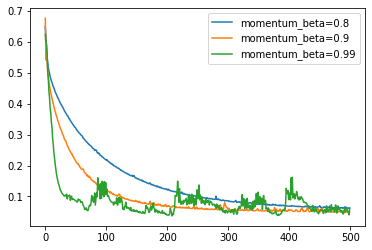

In [11]:
filtered_models = [
    model
    for model in models
    if model["hidden_layers"] == [32, 32] and model["l2_value"] == 0.01
]
for model in filtered_models:
    plt.plot(
        model["results"].history["loss"],
        label="momentum_beta={}".format(model["momentum_beta"]),
    )
plt.legend()
plt.show()

We can see that the model that converged fast and remained stable was with beta = 0.9.

### Study: Effect of L2 values
Fixing hidden_layers = [32, 32] and momentum beta = 0.9, ploting the loss by epoch of different L2 values:

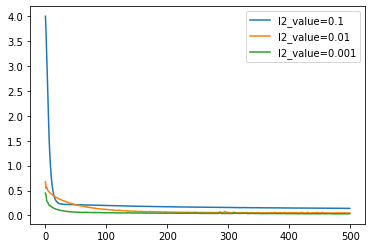

In [12]:
filtered_models = [
    model
    for model in models
    if model["hidden_layers"] == [32, 32] and model["momentum_beta"] == 0.9
]
for model in filtered_models:
    plt.plot(
        model["results"].history["loss"],
        label="l2_value={}".format(model["l2_value"]),
    )
plt.legend()
plt.show()

For this dataset we can see that L2 values of 0.01 and 0.001 in the end were overlapped, so both would be a great choice